# Initialization and importing packages #

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import calendar
import cufflinks as cf
cf.go_offline()
from IPython.display import display, HTML
import psycopg2
import plotly.graph_objs as go
from config import config
import plotly.express as px




ModuleNotFoundError: No module named 'cufflinks'

In [ ]:

# Establish a connection to the database by creating a cursor object

# Obtain the configuration parameters
params = config()
# Connect to the PostgreSQL database
conn = psycopg2.connect(**params)
# Create a new cursor
cur = conn.cursor()


In [ ]:

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table
  


In [ ]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
#sme_main = create_pandas_table("SELECT * FROM sme_main")


sme_main = pd.read_excel('sme_sample2.xlsx')


In [ ]:
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()




## Type conversions  for date 

In [ ]:
sme_main['order_date']=pd.to_datetime(sme_main['order_date'],format='%Y-%m-%d')


In [ ]:
sme_main

count  client_contact_no  order_id client_city   client_address  \
0       138          117304738    232239    omdurman           altaef   
1       139          113215116    232221    omdurman          al60 st   
2       140          118969739    233053    omdurman  alsaha hospital   
3       141          960584360    232233    omdurman     aghora store   
4       142          918144425    232197    omdurman    aljreef gareb   
...     ...                ...       ...         ...              ...   
4143     43          907621253    256025       Bahri           alwaha   
4144     44          909455655    257033       Bahri  altijani almahi   
4145     45          913000779    257034       Bahri             toti   
4146     46          115176109    257035       Bahri         aljarafa   
4147     47          125883691    257036       Bahri          aleskan   

         sme_name order_status order_reason_of_failure    driver_name  \
0       kle store    Delivered                     NaN  mostafa banga   
1            damp    Delivered                     NaN  mostafa banga   
2       kle store    Delivered                     NaN  mostafa banga   
3       kle store    Delivered                     NaN  mostafa banga   
4     orange shop         Hold            Closed phone    Ismail Adam   
...           ...          ...                     ...            ...   
4143    kitty kat    Delivered                     NaN           taha   
4144    kle store    Delivered                     NaN           taha   
4145    kle store    Delivered                     NaN           taha   
4146    kle store    Delivered                     NaN           taha   
4147    kle store         Hold                     NaN           taha   

      order_delivery_fees  order_value rejected order_date  
0                     400         1100      NaN 2021-06-01  
1                     450         7350      NaN 2021-06-01  
2                     400        11250      NaN 2021-06-01  
3                     400         1100      NaN 2021-06-01  
4                     450         1100      NaN 2021-06-01  
...                   ...          ...      ...        ...  
4143                  700         2250      NaN 2021-07-20  
4144                  650         1300      NaN 2021-07-20  
4145                  650         1500      NaN 2021-07-20  
4146                  650         2150      NaN 2021-07-20  
4147                  650            0      NaN 2021-07-20  

[4148 rows x 13 columns]

## csv export code ##
#sme_main.to_csv('sme_main.csv', index=False)

 # creating new columns #

In [ ]:
sme_main['day'] = pd.DatetimeIndex(sme_main['order_date']).day
sme_main['year'] = pd.DatetimeIndex(sme_main['order_date']).year
sme_main['month']= pd.DatetimeIndex(sme_main['order_date']).month
sme_main['week'] = (sme_main['order_date'].dt.strftime('%W').astype(int) )
sme_main['month_name'] = sme_main['month'].apply(lambda x: calendar.month_name[x])
sme_main['driver_fee'] = sme_main['order_delivery_fees']*0.7
sme_main['halan_return'] = sme_main['order_delivery_fees']*0.3
sme_main['sme_return'] = sme_main['order_value'] - sme_main['order_delivery_fees']

In [ ]:
sme_main.describe()

count  client_contact_no       order_id  order_delivery_fees  \
count  4148.000000       4.148000e+03    4148.000000          4148.000000   
mean     66.563886       7.699707e+08  245533.117165           539.754098   
std      48.228517       7.891430e+08   11171.521589           124.857816   
min       1.000000       1.100997e+07  232001.000000           400.000000   
25%      27.000000       1.280777e+08  236033.000000           400.000000   
50%      57.000000       9.123921e+08  243063.500000           450.000000   
75%      98.000000       9.620409e+08  254096.250000           650.000000   
max     239.000000       9.937940e+09  272044.000000           700.000000   

        order_value          day    year        month         week  \
count   4148.000000  4148.000000  4148.0  4148.000000  4148.000000   
mean    3011.333173    11.702989  2021.0     6.416827    25.062440   
std     3377.210924     7.937058     0.0     0.493093     2.141871   
min   -17750.000000     1.000000  2021.0     6.000000    22.000000   
25%     1100.000000     5.000000  2021.0     6.000000    23.000000   
50%     2150.000000    10.000000  2021.0     6.000000    25.000000   
75%     4250.000000    19.000000  2021.0     7.000000    27.000000   
max    26900.000000    29.000000  2021.0     7.000000    29.000000   

        driver_fee  halan_return    sme_return  
count  4148.000000   4148.000000   4148.000000  
mean    377.827869    161.926230   2471.579074  
std      87.400471     37.457345   3373.399150  
min     280.000000    120.000000 -18150.000000  
25%     280.000000    120.000000    650.000000  
50%     315.000000    135.000000   1575.000000  
75%     455.000000    195.000000   3800.000000  
max     490.000000    210.000000  26250.000000

In [ ]:
sme_main

count  client_contact_no  order_id client_city   client_address  \
0       138          117304738    232239    omdurman           altaef   
1       139          113215116    232221    omdurman          al60 st   
2       140          118969739    233053    omdurman  alsaha hospital   
3       141          960584360    232233    omdurman     aghora store   
4       142          918144425    232197    omdurman    aljreef gareb   
...     ...                ...       ...         ...              ...   
4143     43          907621253    256025       Bahri           alwaha   
4144     44          909455655    257033       Bahri  altijani almahi   
4145     45          913000779    257034       Bahri             toti   
4146     46          115176109    257035       Bahri         aljarafa   
4147     47          125883691    257036       Bahri          aleskan   

         sme_name order_status order_reason_of_failure    driver_name  \
0       kle store    Delivered                     NaN  mostafa banga   
1            damp    Delivered                     NaN  mostafa banga   
2       kle store    Delivered                     NaN  mostafa banga   
3       kle store    Delivered                     NaN  mostafa banga   
4     orange shop         Hold            Closed phone    Ismail Adam   
...           ...          ...                     ...            ...   
4143    kitty kat    Delivered                     NaN           taha   
4144    kle store    Delivered                     NaN           taha   
4145    kle store    Delivered                     NaN           taha   
4146    kle store    Delivered                     NaN           taha   
4147    kle store         Hold                     NaN           taha   

      order_delivery_fees  ...  rejected order_date day  year  month  week  \
0                     400  ...       NaN 2021-06-01   1  2021      6    22   
1                     450  ...       NaN 2021-06-01   1  2021      6    22   
2                     400  ...       NaN 2021-06-01   1  2021      6    22   
3                     400  ...       NaN 2021-06-01   1  2021      6    22   
4                     450  ...       NaN 2021-06-01   1  2021      6    22   
...                   ...  ...       ...        ...  ..   ...    ...   ...   
4143                  700  ...       NaN 2021-07-20  20  2021      7    29   
4144                  650  ...       NaN 2021-07-20  20  2021      7    29   
4145                  650  ...       NaN 2021-07-20  20  2021      7    29   
4146                  650  ...       NaN 2021-07-20  20  2021      7    29   
4147                  650  ...       NaN 2021-07-20  20  2021      7    29   

      month_name driver_fee  halan_return  sme_return  
0           June      280.0         120.0         700  
1           June      315.0         135.0        6900  
2           June      280.0         120.0       10850  
3           June      280.0         120.0         700  
4           June      315.0         135.0         650  
...          ...        ...           ...         ...  
4143        July      490.0         210.0        1550  
4144        July      455.0         195.0         650  
4145        July      455.0         195.0         850  
4146        July      455.0         195.0        1500  
4147        July      455.0         195.0        -650  

[4148 rows x 21 columns]

In [ ]:
lr= sme_main['halan']

KeyError: 'halan'

# separating negative and positive order values #

sme_main_negative =sme_main[sme_main['order_value']<0]
sme_main_negative =sme_main_negative[sme_main_negative['month_name']('july')]
#sme_main_negative['sme_return']= ((sme_main_negative['order_value'] + sme_main_negative['order_delivery_fees'])*(-1)).groupby(['sme_name','month_name','driver_name',''])['sme_return'].sum()
#display(HTML(sme_main2[sme_main2["order_delivery_fees"]<700].to_html()))
sme_main_negative

#display(HTML(sme_main_negative.sort_values('order_value',ascending=True).to_html()))

In [ ]:
sme_main_positive = sme_main[sme_main['order_value']>=0]
sme_main_positive

count  client_contact_no  order_id client_city   client_address  \
0       138          117304738    232239    omdurman           altaef   
1       139          113215116    232221    omdurman          al60 st   
2       140          118969739    233053    omdurman  alsaha hospital   
3       141          960584360    232233    omdurman     aghora store   
4       142          918144425    232197    omdurman    aljreef gareb   
...     ...                ...       ...         ...              ...   
4143     43          907621253    256025       Bahri           alwaha   
4144     44          909455655    257033       Bahri  altijani almahi   
4145     45          913000779    257034       Bahri             toti   
4146     46          115176109    257035       Bahri         aljarafa   
4147     47          125883691    257036       Bahri          aleskan   

         sme_name order_status order_reason_of_failure    driver_name  \
0       kle store    Delivered                     NaN  mostafa banga   
1            damp    Delivered                     NaN  mostafa banga   
2       kle store    Delivered                     NaN  mostafa banga   
3       kle store    Delivered                     NaN  mostafa banga   
4     orange shop         Hold            Closed phone    Ismail Adam   
...           ...          ...                     ...            ...   
4143    kitty kat    Delivered                     NaN           taha   
4144    kle store    Delivered                     NaN           taha   
4145    kle store    Delivered                     NaN           taha   
4146    kle store    Delivered                     NaN           taha   
4147    kle store         Hold                     NaN           taha   

      order_delivery_fees  ...  rejected order_date day  year  month  week  \
0                     400  ...       NaN 2021-06-01   1  2021      6    22   
1                     450  ...       NaN 2021-06-01   1  2021      6    22   
2                     400  ...       NaN 2021-06-01   1  2021      6    22   
3                     400  ...       NaN 2021-06-01   1  2021      6    22   
4                     450  ...       NaN 2021-06-01   1  2021      6    22   
...                   ...  ...       ...        ...  ..   ...    ...   ...   
4143                  700  ...       NaN 2021-07-20  20  2021      7    29   
4144                  650  ...       NaN 2021-07-20  20  2021      7    29   
4145                  650  ...       NaN 2021-07-20  20  2021      7    29   
4146                  650  ...       NaN 2021-07-20  20  2021      7    29   
4147                  650  ...       NaN 2021-07-20  20  2021      7    29   

      month_name driver_fee  halan_return  sme_return  
0           June      280.0         120.0         700  
1           June      315.0         135.0        6900  
2           June      280.0         120.0       10850  
3           June      280.0         120.0         700  
4           June      315.0         135.0         650  
...          ...        ...           ...         ...  
4143        July      490.0         210.0        1550  
4144        July      455.0         195.0         650  
4145        July      455.0         195.0         850  
4146        July      455.0         195.0        1500  
4147        July      455.0         195.0        -650  

[4111 rows x 21 columns]

### code to export to csv

In [ ]:
#sme_main.to_csv('sme_main.csv', index=False)

In [ ]:
sme_main2 = sme_main.copy()


### code to display all rows

In [ ]:
#display(HTML(sme_main2[sme_main2["order_delivery_fees"]<700].to_html()))

# Individual client status #

In [ ]:
client_table = sme_main[['client_contact_no','client_city','client_address']]
#client_table['no_of_orders'] = client_table['client_contact_no'].count()
client_table

client_contact_no client_city   client_address
0             117304738    omdurman           altaef
1             113215116    omdurman          al60 st
2             118969739    omdurman  alsaha hospital
3             960584360    omdurman     aghora store
4             918144425    omdurman    aljreef gareb
...                 ...         ...              ...
4143          907621253       Bahri           alwaha
4144          909455655       Bahri  altijani almahi
4145          913000779       Bahri             toti
4146          115176109       Bahri         aljarafa
4147          125883691       Bahri          aleskan

[4148 rows x 3 columns]

In [ ]:
sme_main2['driver_name'].unique()

array(['mostafa banga', 'Ismail Adam', 'omer jamal', 'alfadil', 'Mahdi',
       'taha', 'husham'], dtype=object)

In [ ]:
sme_main2[sme_main2["order_delivery_fees"]<700]

count  client_contact_no  order_id client_city   client_address  \
0       138          117304738    232239    omdurman           altaef   
1       139          113215116    232221    omdurman          al60 st   
2       140          118969739    233053    omdurman  alsaha hospital   
3       141          960584360    232233    omdurman     aghora store   
4       142          918144425    232197    omdurman    aljreef gareb   
...     ...                ...       ...         ...              ...   
4140     40          123068877    257031       Bahri           ombada   
4144     44          909455655    257033       Bahri  altijani almahi   
4145     45          913000779    257034       Bahri             toti   
4146     46          115176109    257035       Bahri         aljarafa   
4147     47          125883691    257036       Bahri          aleskan   

         sme_name order_status           order_reason_of_failure  \
0       kle store    Delivered                               NaN   
1            damp    Delivered                               NaN   
2       kle store    Delivered                               NaN   
3       kle store    Delivered                               NaN   
4     orange shop         Hold                      Closed phone   
...           ...          ...                               ...   
4140    kle store         Hold  Requested to recieve another day   
4144    kle store    Delivered                               NaN   
4145    kle store    Delivered                               NaN   
4146    kle store    Delivered                               NaN   
4147    kle store         Hold                               NaN   

        driver_name  order_delivery_fees  ...  rejected order_date day  year  \
0     mostafa banga                  400  ...       NaN 2021-06-01   1  2021   
1     mostafa banga                  450  ...       NaN 2021-06-01   1  2021   
2     mostafa banga                  400  ...       NaN 2021-06-01   1  2021   
3     mostafa banga                  400  ...       NaN 2021-06-01   1  2021   
4       Ismail Adam                  450  ...       NaN 2021-06-01   1  2021   
...             ...                  ...  ...       ...        ...  ..   ...   
4140           taha                  650  ...       NaN 2021-07-20  20  2021   
4144           taha                  650  ...       NaN 2021-07-20  20  2021   
4145           taha                  650  ...       NaN 2021-07-20  20  2021   
4146           taha                  650  ...       NaN 2021-07-20  20  2021   
4147           taha                  650  ...       NaN 2021-07-20  20  2021   

      month  week  month_name driver_fee  halan_return  sme_return  
0         6    22        June      280.0         120.0         700  
1         6    22        June      315.0         135.0        6900  
2         6    22        June      280.0         120.0       10850  
3         6    22        June      280.0         120.0         700  
4         6    22        June      315.0         135.0         650  
...     ...   ...         ...        ...           ...         ...  
4140      7    29        July      455.0         195.0        -100  
4144      7    29        July      455.0         195.0         650  
4145      7    29        July      455.0         195.0         850  
4146      7    29        July      455.0         195.0        1500  
4147      7    29        July      455.0         195.0        -650  

[3218 rows x 21 columns]

In [ ]:
features_graph_type = {
    'order_status_count':'order_status_count',
    "order_status_percentage":"order_status_percentage",
    'order_reason_of_failure':'order_reason_of_failure',
     'GMV':'GMV',
}

features_order_status = {'Received':'Received',
                         "Delivered":"Delivered",
                         'Cancelled': 'Cancelled',
                         'Hold':'Hold',
                        }
features_order_period = {'Daily':'order_date',
                         'Weekly': 'week',
                         'Monthly':'month_name',
                        }
features_stakeholder = {'Halan':'order_id',
                        'SME':'sme_name',
                        "Driver":"driver_name",
                       }





In [ ]:
order_reason_of_failure = pd.DataFrame(sme_main.dropna(subset=['order_reason_of_failure']).groupby(['month_name','driver_name'])['order_reason_of_failure'].value_counts()).rename(columns={'order_reason_of_failure': 'order_count'}).reset_index()
order_reason_of_failure.groupby('driver_name')['order_count'].sum().reset_index().nlargest(5,'order_count')['driver_name'].unique()

array(['taha', 'omer jamal', 'Ismail Adam', 'mostafa banga', 'alfadil'],
      dtype=object)

In [ ]:
sme_gmv = sme_main[sme_main['order_status']=='Delivered']
sme_gmv.groupby('month_name')[['order_delivery_fees','driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()

month_name  order_delivery_fees  driver_fee  halan_return  sme_return  \
0       July               603450    422415.0      181035.0     2694865   
1       June               938750    657125.0      281625.0     3956795   

   order_value  
0      3298315  
1      4895545

In [ ]:
sme_main2

count  client_contact_no  order_id client_city   client_address  \
0       138          117304738    232239    omdurman           altaef   
1       139          113215116    232221    omdurman          al60 st   
2       140          118969739    233053    omdurman  alsaha hospital   
3       141          960584360    232233    omdurman     aghora store   
4       142          918144425    232197    omdurman    aljreef gareb   
...     ...                ...       ...         ...              ...   
4143     43          907621253    256025       Bahri           alwaha   
4144     44          909455655    257033       Bahri  altijani almahi   
4145     45          913000779    257034       Bahri             toti   
4146     46          115176109    257035       Bahri         aljarafa   
4147     47          125883691    257036       Bahri          aleskan   

         sme_name order_status order_reason_of_failure    driver_name  \
0       kle store    Delivered                     NaN  mostafa banga   
1            damp    Delivered                     NaN  mostafa banga   
2       kle store    Delivered                     NaN  mostafa banga   
3       kle store    Delivered                     NaN  mostafa banga   
4     orange shop         Hold            Closed phone    Ismail Adam   
...           ...          ...                     ...            ...   
4143    kitty kat    Delivered                     NaN           taha   
4144    kle store    Delivered                     NaN           taha   
4145    kle store    Delivered                     NaN           taha   
4146    kle store    Delivered                     NaN           taha   
4147    kle store         Hold                     NaN           taha   

      order_delivery_fees  ...  rejected order_date day  year  month  week  \
0                     400  ...       NaN 2021-06-01   1  2021      6    22   
1                     450  ...       NaN 2021-06-01   1  2021      6    22   
2                     400  ...       NaN 2021-06-01   1  2021      6    22   
3                     400  ...       NaN 2021-06-01   1  2021      6    22   
4                     450  ...       NaN 2021-06-01   1  2021      6    22   
...                   ...  ...       ...        ...  ..   ...    ...   ...   
4143                  700  ...       NaN 2021-07-20  20  2021      7    29   
4144                  650  ...       NaN 2021-07-20  20  2021      7    29   
4145                  650  ...       NaN 2021-07-20  20  2021      7    29   
4146                  650  ...       NaN 2021-07-20  20  2021      7    29   
4147                  650  ...       NaN 2021-07-20  20  2021      7    29   

      month_name driver_fee  halan_return  sme_return  
0           June      280.0         120.0         700  
1           June      315.0         135.0        6900  
2           June      280.0         120.0       10850  
3           June      280.0         120.0         700  
4           June      315.0         135.0         650  
...          ...        ...           ...         ...  
4143        July      490.0         210.0        1550  
4144        July      455.0         195.0         650  
4145        July      455.0         195.0         850  
4146        July      455.0         195.0        1500  
4147        July      455.0         195.0        -650  

[4148 rows x 21 columns]

In [ ]:
sme_main2['client_contact_no'] =pd.to_numeric(sme_main['client_contact_no'])

In [ ]:
sme_main2 = sme_main2.drop(sme_main2[(sme_main2['client_contact_no']< 100000000) ].index)


In [ ]:
sme_main2 =sme_main2.drop(sme_main2[(sme_main2['client_contact_no']> 999999999) ].index)


In [ ]:
sme_main2.sort_values(by=['client_contact_no'])

count  client_contact_no  order_id client_city  client_address  \
1164     71          100095153    246061    khartoum   allamab nasir   
3572     71          100095153    246061    khartoum   allamab nasir   
4072    102          100110234    256079    khartoum        jabra 13   
1664    102          100110234    256079    khartoum        jabra 13   
1308     46          100523207    247024    khartoum           gazza   
...     ...                ...       ...         ...             ...   
1896     65          999982999    262053       Bahri         alsafia   
2426    119          999985607    233045    khartoum           afraa   
368     119          999985607    233045    khartoum     althawra 24   
2186     62          999994142    266052    khartoum  alsalam rotana   
2289     66          999999805    267043    khartoum        alsahafa   

           sme_name order_status           order_reason_of_failure  \
1164      kle store    Delivered                               NaN   
3572      kle store    Delivered                               NaN   
4072  rofayda store    Delivered                               NaN   
1664  rofayda store    Delivered                               NaN   
1308           damp    Delivered                               NaN   
...             ...          ...                               ...   
1896      kle store    Delivered                               NaN   
2426           damp    Delivered                               NaN   
368       kle store    Cancelled                  Wrong order info   
2186      kle store         Hold  Requested to recieve another day   
2289           damp         Hold                     Not answering   

        driver_name  order_delivery_fees  ...  rejected order_date day  year  \
1164    Ismail Adam                  550  ...       NaN 2021-06-12  12  2021   
3572    Ismail Adam                  550  ...       NaN 2021-07-12  12  2021   
4072        alfadil                  700  ...       NaN 2021-07-19  19  2021   
1664        alfadil                  700  ...       NaN 2021-06-19  19  2021   
1308        alfadil                  700  ...       NaN 2021-06-13  13  2021   
...             ...                  ...  ...       ...        ...  ..   ...   
1896          Mahdi                  650  ...       NaN 2021-06-22  22  2021   
2426  mostafa banga                  450  ...       NaN 2021-07-01   1  2021   
368            taha                  400  ...       NaN 2021-06-02   2  2021   
2186        alfadil                  650  ...       NaN 2021-06-26  26  2021   
2289        alfadil                  700  ...       NaN 2021-06-27  27  2021   

      month  week  month_name driver_fee  halan_return  sme_return  
1164      6    23        June      385.0         165.0        8900  
3572      7    28        July      385.0         165.0        8900  
4072      7    29        July      490.0         210.0           0  
1664      6    24        June      490.0         210.0           0  
1308      6    23        June      490.0         210.0        2300  
...     ...   ...         ...        ...           ...         ...  
1896      6    25        June      455.0         195.0        -650  
2426      7    26        July      315.0         135.0        1500  
368       6    22        June      280.0         120.0        -400  
2186      6    25        June      455.0         195.0         800  
2289      6    25        June      490.0         210.0        2300  

[4079 rows x 21 columns]

In [ ]:
#display(HTML(sme_main.to_html()))

In [ ]:
daily_count = pd.DataFrame(sme_main.groupby('order_date')['order_status'].value_counts()).rename(columns={'order_status': 'order_count'}).reset_index()
dfx = pd.DataFrame(daily_count.groupby(['order_date'])['order_count'].agg('sum')).rename(columns={'order_count': 'order_sum'}).reset_index()
daily_count = pd.merge(daily_count, dfx, on="order_date")
daily_count['status_percentage'] = daily_count['order_count']/daily_count['order_sum']


In [ ]:
daily_count

order_date order_status  order_count  order_sum  status_percentage
0   2021-06-01         Hold          117        239           0.489540
1   2021-06-01    Delivered          111        239           0.464435
2   2021-06-01    Cancelled           11        239           0.046025
3   2021-06-02    Delivered           94        148           0.635135
4   2021-06-02         Hold           40        148           0.270270
..         ...          ...          ...        ...                ...
119 2021-07-19         Hold           21        130           0.161538
120 2021-07-19    Cancelled           14        130           0.107692
121 2021-07-20    Delivered           40         58           0.689655
122 2021-07-20         Hold           12         58           0.206897
123 2021-07-20    Cancelled            6         58           0.103448

[124 rows x 5 columns]

# This is the GMV Section #

In [ ]:
sme_status = pd.DataFrame(sme_main.groupby(['order_date','sme_name','order_status'])['sme_name'].value_counts()).reset_index(level=1, drop=True).rename(columns={'sme_name': 'order_count'}).reset_index()
sme_status


order_date order_status       sme_name  order_count
0   2021-06-01         Hold      coco shop            1
1   2021-06-01    Cancelled           damp            2
2   2021-06-01    Delivered           damp           30
3   2021-06-01         Hold           damp           31
4   2021-06-01    Delivered     dr. palmer            1
..         ...          ...            ...          ...
593 2021-07-20         Hold      kle store            6
594 2021-07-20    Delivered  rofayda store            1
595 2021-07-20    Cancelled         senior            3
596 2021-07-20    Delivered         senior           11
597 2021-07-20         Hold         senior            4

[598 rows x 4 columns]

In [ ]:
sme_gmv =  sme_main.groupby('order_date')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()


daily_order_status =pd.DataFrame(sme_main.groupby('order_date')['order_status'].value_counts()).rename(columns={'order_status': 'order_count'}).reset_index()
options = ['Delivered','Cancelled','Hold']
option = 'Delivered'
orders_delivered_daily = daily_order_status[ (daily_order_status['order_status']=='Delivered')].drop('order_status', axis=1)
orders_cancelled_daily = daily_order_status[ (daily_order_status['order_status']=='Cancelled')].drop('order_status', axis=1)
orders_hold_daily = daily_order_status[ (daily_order_status['order_status']=='Hold')].drop('order_status', axis=1)
orders_received_daily =pd.DataFrame(sme_main.groupby('order_date')['order_date'].value_counts()).reset_index(level=1, drop=True).rename(columns={'order_date': 'order_count'}).reset_index()


In [ ]:
halan_regression = pd.merge(sme_gmv,orders_delivered_daily,how='inner',on='order_date').rename(columns={'order_count': 'Delivered'})


In [ ]:
halan_regression = pd.merge(halan_regression,orders_received_daily,how='inner',on='order_date').rename(columns={'order_count': 'Received'})

In [ ]:
halan_regression['delivered_percentage']=(halan_regression['Delivered']/halan_regression['Received'])

In [ ]:
halan_regression



order_date  driver_fee  halan_return  sme_return  order_value  Delivered  \
0  2021-06-01     71015.0       30435.0      751470       852920        111   
1  2021-06-02     43995.0       18855.0      426350       489200         94   
2  2021-06-05     43505.0       18645.0      198100       260250         92   
3  2021-06-06     22015.0        9435.0      105450       136900         47   
4  2021-06-07     29925.0       12825.0      262450       305200         70   
5  2021-06-08     46130.0       19770.0      441000       506900         95   
6  2021-06-09     40005.0       17145.0      398200       455350         93   
7  2021-06-10     25270.0       10830.0      173475       209575         58   
8  2021-06-12     76475.0       32775.0      441000       550250        125   
9  2021-06-13     25410.0       10890.0      148650       184950         37   
10 2021-06-14     10780.0        4620.0       22100        37500         20   
11 2021-06-15     30415.0       13035.0      154770       198220         55   
12 2021-06-16      5880.0        2520.0       35050        43450          8   
13 2021-06-17     66185.0       28365.0      255170       349720        116   
14 2021-06-19     60480.0       25920.0      309360       395760         95   
15 2021-06-20     45010.0       19290.0      261700       326000         60   
16 2021-06-21     21245.0        9105.0       98950       129300         29   
17 2021-06-22     64820.0       27780.0      312140       404740         97   
18 2021-06-23     24535.0       10515.0      130680       165730         35   
19 2021-06-24     47390.0       20310.0      367090       434790         86   
20 2021-06-26     46550.0       19950.0      227690       294190         67   
21 2021-06-27     50085.0       21465.0      275250       346800         77   
22 2021-06-28     23695.0       10155.0      109250       143100         36   
23 2021-06-29     24920.0       10680.0      107870       143470         42   
24 2021-07-01     71015.0       30435.0      751470       852920        111   
25 2021-07-02     36330.0       15570.0      333400       385300         78   
26 2021-07-03      8295.0        3555.0       92950       104800         18   
27 2021-07-04     16765.0        7185.0       83850       107800         37   
28 2021-07-05     26110.0       11190.0      114250       151550         53   
29 2021-07-06     30450.0       13050.0      183600       227100         64   
30 2021-07-07     22120.0        9480.0      190700       222300         54   
31 2021-07-08     42105.0       18045.0      405650       465800         84   
32 2021-07-09     40005.0       17145.0      398200       455350         93   
33 2021-07-10     25270.0       10830.0      173475       209575         58   
34 2021-07-12     76475.0       32775.0      441000       550250        125   
35 2021-07-13     25410.0       10890.0      148650       184950         37   
36 2021-07-14     10780.0        4620.0       22100        37500         20   
37 2021-07-15     30415.0       13035.0      154770       198220         55   
38 2021-07-16      5880.0        2520.0       35050        43450          8   
39 2021-07-17     66185.0       28365.0      255170       349720        116   
40 2021-07-19     60480.0       25920.0      309360       395760         95   
41 2021-07-20     27405.0       11745.0      145250       184400         40   

    Received  delivered_percentage  
0        239              0.464435  
1        148              0.635135  
2        148              0.621622  
3         76              0.618421  
4        103              0.679612  
5        153              0.620915  
6        131              0.709924  
7         85              0.682353  
8        170              0.735294  
9         57              0.649123  
10        22              0.909091  
11        65              0.846154  
12        12              0.666667  
13       143              0.811189  
14       130              0.730769  
15        95 

In [ ]:
halan_regression.describe()

driver_fee  halan_return     sme_return    order_value   Delivered  \
count     42.000000     42.000000      42.000000      42.000000   42.000000   
mean   37315.000000  15992.142857  244097.857143  297405.000000   66.452381   
std    19946.415168   8548.463643  169659.540304  193343.667888   33.042620   
min     5880.000000   2520.000000   22100.000000   37500.000000    8.000000   
25%    24631.250000  10556.250000  118357.500000  155095.000000   37.750000   
50%    30432.500000  13042.500000  194400.000000  243675.000000   62.000000   
75%    47180.000000  20220.000000  328085.000000  402495.000000   93.750000   
max    76475.000000  32775.000000  751470.000000  852920.000000  125.000000   

         Received  delivered_percentage  
count   42.000000             42.000000  
mean    98.761905              0.695080  
std     54.501649              0.096581  
min     12.000000              0.464435  
25%     57.000000              0.640222  
50%     97.000000              0.682353  
75%    137.000000              0.733713  
max    239.000000              0.909091

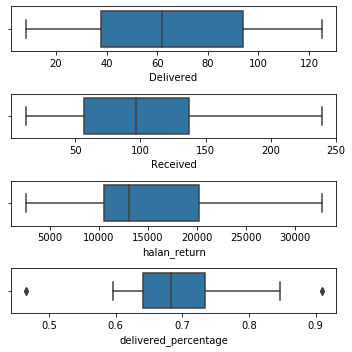

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(halan_regression['Delivered'], ax = axs[0])
plt2 = sns.boxplot(halan_regression['Received'], ax = axs[1])
plt3 = sns.boxplot(halan_regression['halan_return'], ax = axs[2])
plt1 = sns.boxplot(halan_regression['delivered_percentage'], ax = axs[3])
plt.tight_layout()

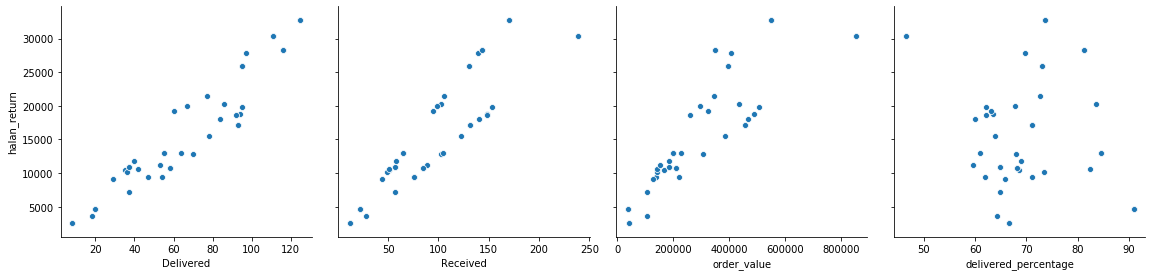

In [ ]:
sns.pairplot(halan_regression, x_vars=['Delivered', 'Received', 'order_value','delivered_percentage'], y_vars='halan_return', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
halan_regression.corr()

driver_fee  halan_return  sme_return  order_value  \
driver_fee              1.000000      1.000000    0.805210     0.853953   
halan_return            1.000000      1.000000    0.805210     0.853953   
sme_return              0.805210      0.805210    1.000000     0.996174   
order_value             0.853953      0.853953    0.996174     1.000000   
Delivered               0.944936      0.944936    0.825050     0.863247   
Received                0.893696      0.893696    0.935166     0.952323   
delivered_percentage   -0.140117     -0.140117   -0.452648    -0.417850   

                      Delivered  Received  delivered_percentage  
driver_fee             0.944936  0.893696             -0.140117  
halan_return           0.944936  0.893696             -0.140117  
sme_return             0.825050  0.935166             -0.452648  
order_value            0.863247  0.952323             -0.417850  
Delivered              1.000000  0.932520             -0.144586  
Received               0.932520  1.000000             -0.427183  
delivered_percentage  -0.144586 -0.427183              1.000000

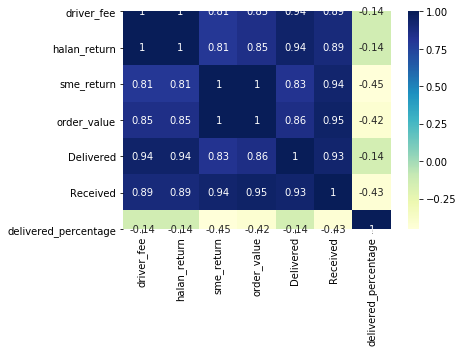

In [ ]:
sns.heatmap(halan_regression.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
y = halan_regression['delivered_percentage'] #Delivered
X = halan_regression['halan_return']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

32    17145.0
25    15570.0
28    11190.0
19    20310.0
13    28365.0
Name: halan_return, dtype: float64

In [ ]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()




C:\Users\moham\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
lr.params

const           7.097811e-01
halan_return   -6.975634e-07
dtype: float64

In [ ]:
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     delivered_percentage   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                 -0.033
Method:                   Least Squares   F-statistic:                    0.1066
Date:                  Tue, 25 Jan 2022   Prob (F-statistic):              0.747
Time:                          04:09:20   Log-Likelihood:                 27.416
No. Observations:                    29   AIC:                            -50.83
Df Residuals:                        27   BIC:                            -48.10
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7098     

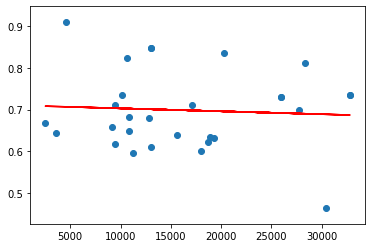

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train,  7.097811e-01 +  -6.975634e-07*X_train, 'r')
plt.show()

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

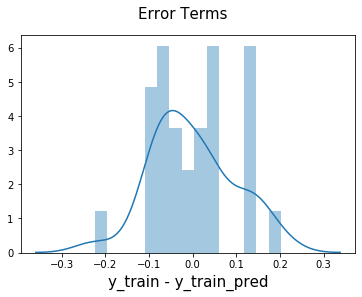

In [ ]:

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

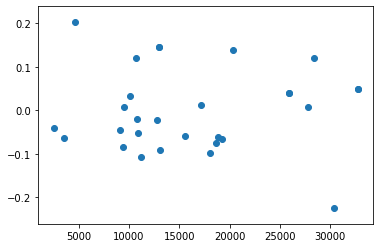

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:


y_pred.head()



27    0.704769
5     0.695990
6     0.697821
38    0.708023
21    0.694808
dtype: float64

In [ ]:


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))


0.09667671682117521

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.021211100649963344

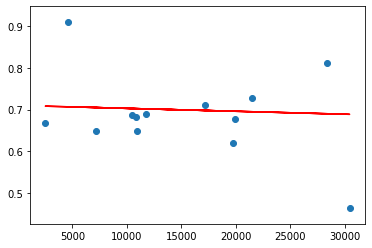

In [ ]:
plt.scatter(X_test, y_test)

plt.plot(X_test,  7.097811e-01 +  -6.975634e-07 * X_test, 'r')
plt.show()

In [ ]:
daily_gmv = sme_main.groupby('order_date')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()
monthly_gmv =sme_main.groupby('month_name')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()
weekly_gmv = sme_main.groupby('week')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()
yearly_gmv = sme_main.groupby('year')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()


In [ ]:
#calculating GMV
daily_gmv = sme_main.groupby('order_date')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()
daily_gmv

order_date  driver_fee  halan_return  sme_return  order_value
0  2021-06-01     71015.0       30435.0      751470       852920
1  2021-06-02     43995.0       18855.0      426350       489200
2  2021-06-05     43505.0       18645.0      198100       260250
3  2021-06-06     22015.0        9435.0      105450       136900
4  2021-06-07     29925.0       12825.0      262450       305200
5  2021-06-08     46130.0       19770.0      441000       506900
6  2021-06-09     40005.0       17145.0      398200       455350
7  2021-06-10     25270.0       10830.0      173475       209575
8  2021-06-12     76475.0       32775.0      441000       550250
9  2021-06-13     25410.0       10890.0      148650       184950
10 2021-06-14     10780.0        4620.0       22100        37500
11 2021-06-15     30415.0       13035.0      154770       198220
12 2021-06-16      5880.0        2520.0       35050        43450
13 2021-06-17     66185.0       28365.0      255170       349720
14 2021-06-19     60480.0       25920.0      309360       395760
15 2021-06-20     45010.0       19290.0      261700       326000
16 2021-06-21     21245.0        9105.0       98950       129300
17 2021-06-22     64820.0       27780.0      312140       404740
18 2021-06-23     24535.0       10515.0      130680       165730
19 2021-06-24     47390.0       20310.0      367090       434790
20 2021-06-26     46550.0       19950.0      227690       294190
21 2021-06-27     50085.0       21465.0      275250       346800
22 2021-06-28     23695.0       10155.0      109250       143100
23 2021-06-29     24920.0       10680.0      107870       143470
24 2021-07-01     71015.0       30435.0      751470       852920
25 2021-07-02     36330.0       15570.0      333400       385300
26 2021-07-03      8295.0        3555.0       92950       104800
27 2021-07-04     16765.0        7185.0       83850       107800
28 2021-07-05     26110.0       11190.0      114250       151550
29 2021-07-06     30450.0       13050.0      183600       227100
30 2021-07-07     22120.0        9480.0      190700       222300
31 2021-07-08     42105.0       18045.0      405650       465800
32 2021-07-09     40005.0       17145.0      398200       455350
33 2021-07-10     25270.0       10830.0      173475       209575
34 2021-07-12     76475.0       32775.0      441000       550250
35 2021-07-13     25410.0       10890.0      148650       184950
36 2021-07-14     10780.0        4620.0       22100        37500
37 2021-07-15     30415.0       13035.0      154770       198220
38 2021-07-16      5880.0        2520.0       35050        43450
39 2021-07-17     66185.0       28365.0      255170       349720
40 2021-07-19     60480.0       25920.0      309360       395760
41 2021-07-20     27405.0       11745.0      145250       184400

In [ ]:
monthly_gmv =sme_main.groupby('month_name')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()
monthly_gmv

month_name  driver_fee  halan_return  sme_return  order_value
0       July    621495.0      266355.0     4238895      5126745
1       June    945735.0      405315.0     6013215      7364265

In [ ]:
weekly_gmv = sme_main.groupby('week')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()
weekly_gmv

week  driver_fee  halan_return  sme_return  order_value
0    22    180530.0       77370.0     1481370      1739270
1    23    243215.0      104235.0     1864775      2212225
2    24    218750.0       93750.0     1038150      1350650
3    25    254625.0      109125.0     1411800      1775550
4    26    181020.0       77580.0     1478790      1737390
5    27    186060.0       79740.0     1465875      1731675
6    28    215145.0       92205.0     1056740      1364090
7    29     87885.0       37665.0      454610       580160

In [ ]:
yearly_gmv = sme_main.groupby('year')[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index()
yearly_gmv

year  driver_fee  halan_return  sme_return  order_value
0  2021   1567230.0      671670.0    10252110     12491010

# Individual vendor's delivery percentage and driver percentage #

In [ ]:
sme_bus_grp = sme_main.groupby(["sme_name"])
sme_bus_grp

In [ ]:
sme_bus_grp.get_group('antique')['order_id'].count()

3

In [ ]:
stores_dict = {}

for x in sme_bus_grp:
    stores_dict[x[0]] = sme_bus_grp.get_group(x[0])['order_id'].count()

#stores_dict
stores_df = pd.DataFrame.from_dict(stores_dict, orient='index',columns=[ 'order_count'])
stores_df['order_count']

Ghada altyeb            2
adil                    2
aghora store            9
aladin store            5
antique                 3
beja plaza             42
c & k                   5
coco shop              36
compex store           11
damp                  743
dr. palmer             43
dr. sraa                2
duaa same              36
fathi                   4
how you do store      119
joyous                  1
kaino war              10
ketchup                30
king                    3
kitty kat              22
kle store            2156
magazine                4
neon sudan             16
omama shop              3
one time delivery       2
orange shop           427
rihanna                 4
rofayda store          37
ronaldo store          54
selvester               4
senior                 87
similar                66
somo tech               6
steel                  69
the shopify             8
uae                    55
whatsup                14
yes sir                 8
Name: order_

In [ ]:
sme_bus_list = sme_main['sme_name'].unique()

In [ ]:
sme_bus_list

array(['kle store', 'damp', 'orange shop', 'kaino war', 'duaa same',
       'how you do store', 'ronaldo store', 'fathi', 'coco shop',
       'selvester', 'dr. palmer', 'steel', 'whatsup', 'neon sudan',
       'rihanna', 'kitty kat', 'similar', 'somo tech', 'omama shop',
       'aghora store', 'one time delivery', 'the shopify', 'magazine',
       'adil', 'yes sir ', 'ketchup', 'uae', 'beja plaza', 'dr. sraa',
       'rofayda store', 'senior', 'c & k', 'king', 'Ghada altyeb',
       'joyous', 'antique', 'aladin store', 'compex store'], dtype=object)

In [ ]:
sme_asc = sme_main.groupby("sme_name")['order_status'].value_counts()
sme_asc = sme_asc.to_frame(name='status_breakdown')

#display(HTML(sme_asc.to_html()))
sme_asc


status_breakdown
sme_name     order_status                  
Ghada altyeb Hold                         2
adil         Delivered                    2
aghora store Delivered                    9
aladin store Delivered                    5
antique      Delivered                    2
...                                     ...
uae          Hold                         5
whatsup      Hold                        10
             Delivered                    4
yes sir      Delivered                    4
             Hold                         4

[70 rows x 1 columns]

In [ ]:
#sme_asc['Order Count'] = stores_df['Order Count']

In [ ]:
#sme_asc['Order Count'] = sme_bus_grp.get_group(x[0])['Order ID'].count()

In [ ]:
sme_orders = pd.concat([sme_asc, stores_df], axis=0,sort=True)
stores_series = sme_asc.index.get_level_values('sme_name')
sme_asc['order_count'] = stores_df.loc[stores_series].values

In [ ]:
sme_orders

order_count  status_breakdown
(Ghada altyeb, Hold)               NaN               2.0
(adil, Delivered)                  NaN               2.0
(aghora store, Delivered)          NaN               9.0
(aladin store, Delivered)          NaN               5.0
(antique, Delivered)               NaN               2.0
...                                ...               ...
steel                             69.0               NaN
the shopify                        8.0               NaN
uae                               55.0               NaN
whatsup                           14.0               NaN
yes sir                            8.0               NaN

[108 rows x 2 columns]

In [ ]:
sme_asc

status_breakdown  order_count
sme_name     order_status                               
Ghada altyeb Hold                         2            2
adil         Delivered                    2            2
aghora store Delivered                    9            9
aladin store Delivered                    5            5
antique      Delivered                    2            3
...                                     ...          ...
uae          Hold                         5           55
whatsup      Hold                        10           14
             Delivered                    4           14
yes sir      Delivered                    4            8
             Hold                         4            8

[70 rows x 2 columns]

In [ ]:
sme_asc2 = sme_asc.reset_index()

sme_asc2['status_percentage'] = sme_asc2['status_breakdown']/sme_asc2['order_count']
sme_asc2 = sme_asc2.style.format({'daily_delivered_percentage': "{:.2%}"})
sme_asc2

NameError: name 'sme_asc' is not defined

# Reason of failure

In [ ]:
r_o_f = sme_main.dropna(subset=['order_reason_of_failure'])
r_o_f

count  client_contact_no  order_id client_city client_address  \
4       142          918144425    232197    omdurman  aljreef gareb   
6       144          922231743    232227    omdurman         altaef   
11        1          995577449    232001    khartoum        al60 st   
14        4          114619757    232004    khartoum         altaef   
17        7          113556400    232007    khartoum     alazhari 4   
...     ...                ...       ...         ...            ...   
4133     33          124450369    257024       Bahri     aldroushab   
4136     36          968651614    257027       Bahri       kafori 8   
4139     39          912306967    257030       Bahri          jabra   
4140     40          123068877    257031       Bahri         ombada   
4142     42          996773327    257032       Bahri         alarda   

         sme_name order_status           order_reason_of_failure  \
4     orange shop         Hold                      Closed phone   
6       duaa same         Hold                     Not answering   
11      kle store         Hold                     Not answering   
14    orange shop         Hold  Requested to recieve another day   
17      kle store         Hold  Requested to recieve another day   
...           ...          ...                               ...   
4133         damp         Hold  Requested to recieve another day   
4136    kle store         Hold  Requested to recieve another day   
4139    kle store    Cancelled                             Fraud   
4140    kle store         Hold  Requested to recieve another day   
4142       senior    Cancelled                             Fraud   

        driver_name  order_delivery_fees  ...  rejected order_date day  year  \
4       Ismail Adam                  450  ...       NaN 2021-06-01   1  2021   
6       Ismail Adam                  450  ...       NaN 2021-06-01   1  2021   
11    mostafa banga                  400  ...       NaN 2021-06-01   1  2021   
14    mostafa banga                  450  ...       NaN 2021-06-01   1  2021   
17    mostafa banga                  400  ...       NaN 2021-06-01   1  2021   
...             ...                  ...  ...       ...        ...  ..   ...   
4133          Mahdi                  700  ...       NaN 2021-07-20  20  2021   
4136          Mahdi                  650  ...       NaN 2021-07-20  20  2021   
4139           taha                  650  ...       NaN 2021-07-20  20  2021   
4140           taha                  650  ...       NaN 2021-07-20  20  2021   
4142           taha                  700  ...       NaN 2021-07-20  20  2021   

      month  week  month_name driver_fee  halan_return  sme_return  
4         6    22        June      315.0         135.0         650  
6         6    22        June      315.0         135.0        3600  
11        6    22        June      280.0         120.0         500  
14        6    22        June      315.0         135.0        1500  
17        6    22        June      280.0         120.0         700  
...     ...   ...         ...        ...           ...         ...  
4133      7    29        July      490.0         210.0        3800  
4136      7    29        July      455.0         195.0         850  
4139      7    29        July      455.0         195.0         850  
4140      7    29        July      455.0         195.0        -100  
4142      7    29        July      490.0         210.0        1100  

[958 rows x 21 columns]

In [ ]:
sme_business = sme_main[['sme_name','order_status','order_date']]
sme_business = sme_business.groupby(['sme_name'])['order_status'].value_counts()
sme_business

sme_name      order_status
Ghada altyeb  Hold             2
adil          Delivered        2
aghora store  Delivered        9
aladin store  Delivered        5
antique       Delivered        2
                              ..
uae           Hold             5
whatsup       Hold            10
              Delivered        4
yes sir       Delivered        4
              Hold             4
Name: order_status, Length: 70, dtype: int64

# Most Active SMEs

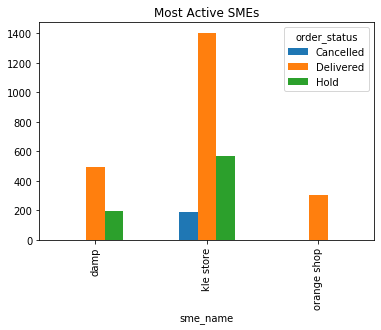

In [ ]:
#sme_main.groupby("Business")['Status'].value_counts().unstack().plot.bar(legend=True,  title='TITLE')
display(sme_asc[sme_asc['status_breakdown']>=100]['status_breakdown'].unstack().plot.bar(legend=True,  title='Most Active SMEs'))


In [ ]:
#sme_asc2.info

In [ ]:
#sme_plot1 = sme_asc.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(19, 2))
#plt.tight_layout(pad =3)

In [ ]:
#display(sme_plot1)

In [ ]:
sme_status2 =sme_main[['sme_name','order_status','order_value','order_date']]
sme_status_sum = sme_status2.groupby('order_date')[['sme_name', 'order_status','order_value']]
#.reset_index()
#.rename(columns={'order_status': 'order_count'}) 
#sme_status2 = sme_status2.reset_index()
sme_status2

sme_name order_status  order_value order_date
0       kle store    Delivered         1100 2021-06-01
1            damp    Delivered         7350 2021-06-01
2       kle store    Delivered        11250 2021-06-01
3       kle store    Delivered         1100 2021-06-01
4     orange shop         Hold         1100 2021-06-01
...           ...          ...          ...        ...
4143    kitty kat    Delivered         2250 2021-07-20
4144    kle store    Delivered         1300 2021-07-20
4145    kle store    Delivered         1500 2021-07-20
4146    kle store    Delivered         2150 2021-07-20
4147    kle store         Hold            0 2021-07-20

[4148 rows x 4 columns]

In [ ]:

sme_status =pd.DataFrame(sme_main.groupby('sme_name')['order_status'].value_counts())
sme_status = sme_status.rename(columns={'order_status': 'order_count'}) 
sme_status = sme_status.reset_index()

sme_status

sme_name order_status  order_count
0   Ghada altyeb         Hold            2
1           adil    Delivered            2
2   aghora store    Delivered            9
3   aladin store    Delivered            5
4        antique    Delivered            2
..           ...          ...          ...
65           uae         Hold            5
66       whatsup         Hold           10
67       whatsup    Delivered            4
68      yes sir     Delivered            4
69      yes sir          Hold            4

[70 rows x 3 columns]

In [ ]:
#display(HTML(sme_status.to_html()))

# Individual store stats #

In [ ]:
name = 'antique'

In [ ]:


def store_stat(name):
    filt = sme_main['sme_name'] == name
    df = sme_main.loc[filt][['order_id','client_contact_no', 'client_address','order_status', 'order_delivery_fees', 'sme_return','order_date']]
    return df
    

In [ ]:
store_stat(name)

order_id  client_contact_no client_address order_status  \
2001    257056          127119091       arkaweet    Delivered   
2010    262082          929843892       almamora    Delivered   
2371    232232          968594215   alhaj yousef         Hold   

      order_delivery_fees  sme_return order_date  
2001                  700           0 2021-06-23  
2010                  700        4000 2021-06-23  
2371                  700        8700 2021-06-29

In [ ]:
client_city = sme_main.groupby('client_city')['client_city'].value_counts()
client_city.to_frame(name = 'city_count')

city_count
client_city client_city            
Bahri       Bahri              1002
khartoum    khartoum           2125
omdurman    omdurman           1021

In [ ]:
client_city2 = pd.DataFrame(sme_main.groupby('client_city')['client_city'].value_counts()).rename(columns={'client_city': 'city_count'}).reset_index(level=1, drop=True).reset_index()
client_city2


client_city  city_count
0       Bahri        1002
1    khartoum        2125
2    omdurman        1021

In [ ]:
weekly_status = sme_main.groupby('week')['order_status'].value_counts()
weekly_status

week  order_status
22    Delivered       344
      Hold            231
      Cancelled        36
23    Delivered       478
      Hold            171
      Cancelled        49
24    Delivered       354
      Hold             70
      Cancelled        43
25    Delivered       391
      Hold            106
      Cancelled        45
26    Delivered       322
      Hold            189
      Cancelled        35
27    Delivered       406
      Hold            175
      Cancelled        44
28    Delivered       361
      Hold             73
      Cancelled        35
29    Delivered       135
      Hold             33
      Cancelled        20
Name: order_status, dtype: int64

In [ ]:
weekly_fees = sme_main.groupby('week')['order_delivery_fees'].sum()
weekly_fees

week
22    257900
23    347450
24    312500
25    363750
26    258600
27    265800
28    307350
29    125550
Name: order_delivery_fees, dtype: int64

In [ ]:
monthly_status = sme_main.groupby('month_name')['order_status'].value_counts()
monthly_status

month_name  order_status
July        Delivered       1146
            Hold             456
            Cancelled        126
June        Delivered       1645
            Hold             592
            Cancelled        181
Name: order_status, dtype: int64

In [ ]:
monthly_fees = sme_main.groupby('month_name')['order_delivery_fees'].sum()
monthly_fees

month_name
July     887850
June    1351050
Name: order_delivery_fees, dtype: int64

In [ ]:
yearly_status = sme_main.groupby('year')['order_status'].value_counts()
yearly_status

year  order_status
2021  Delivered       2791
      Hold            1048
      Cancelled        307
Name: order_status, dtype: int64

In [ ]:
yearly_fees = sme_main.groupby('year')['order_delivery_fees'].sum()
yearly_fees

year
2021    2238900
Name: order_delivery_fees, dtype: int64

In [ ]:

sme_delivered = sme_main.loc[sme_main['order_status'] == 'Delivered']
sme_failed = sme_main.loc[sme_main['order_status'] != 'Delivered']


sme_failed

count  client_contact_no  order_id client_city client_address  \
4       142          918144425    232197    omdurman  aljreef gareb   
6       144          922231743    232227    omdurman         altaef   
11        1          995577449    232001    khartoum        al60 st   
14        4          114619757    232004    khartoum         altaef   
17        7          113556400    232007    khartoum     alazhari 4   
...     ...                ...       ...         ...            ...   
4137     37          998622936    257028       Bahri       kafori 9   
4139     39          912306967    257030       Bahri          jabra   
4140     40          123068877    257031       Bahri         ombada   
4142     42          996773327    257032       Bahri         alarda   
4147     47          125883691    257036       Bahri        aleskan   

         sme_name order_status           order_reason_of_failure  \
4     orange shop         Hold                      Closed phone   
6       duaa same         Hold                     Not answering   
11      kle store         Hold                     Not answering   
14    orange shop         Hold  Requested to recieve another day   
17      kle store         Hold  Requested to recieve another day   
...           ...          ...                               ...   
4137       senior    Cancelled                               NaN   
4139    kle store    Cancelled                             Fraud   
4140    kle store         Hold  Requested to recieve another day   
4142       senior    Cancelled                             Fraud   
4147    kle store         Hold                               NaN   

        driver_name  order_delivery_fees  ...  rejected order_date day  year  \
4       Ismail Adam                  450  ...       NaN 2021-06-01   1  2021   
6       Ismail Adam                  450  ...       NaN 2021-06-01   1  2021   
11    mostafa banga                  400  ...       NaN 2021-06-01   1  2021   
14    mostafa banga                  450  ...       NaN 2021-06-01   1  2021   
17    mostafa banga                  400  ...       NaN 2021-06-01   1  2021   
...             ...                  ...  ...       ...        ...  ..   ...   
4137          Mahdi                  700  ...       NaN 2021-07-20  20  2021   
4139           taha                  650  ...       NaN 2021-07-20  20  2021   
4140           taha                  650  ...       NaN 2021-07-20  20  2021   
4142           taha                  700  ...       NaN 2021-07-20  20  2021   
4147           taha                  650  ...       NaN 2021-07-20  20  2021   

      month  week  month_name driver_fee  halan_return  sme_return  
4         6    22        June      315.0         135.0         650  
6         6    22        June      315.0         135.0        3600  
11        6    22        June      280.0         120.0         500  
14        6    22        June      315.0         135.0        1500  
17        6    22        June      280.0         120.0         700  
...     ...   ...         ...        ...           ...         ...  
4137      7    29        July      490.0         210.0        2600  
4139      7    29        July      455.0         195.0         850  
4140      7    29        July      455.0         195.0        -100  
4142      7    29        July      490.0         210.0        1100  
4147      7    29        July      455.0         195.0        -650  

[1357 rows x 21 columns]

In [ ]:
sme_delivered = sme_delivered.drop(['order_reason_of_failure'], axis=1)


In [ ]:
sme_delivered

count  client_contact_no  order_id client_city   client_address  \
0       138          117304738    232239    omdurman           altaef   
1       139          113215116    232221    omdurman          al60 st   
2       140          118969739    233053    omdurman  alsaha hospital   
3       141          960584360    232233    omdurman     aghora store   
5       143          126513555    233054    omdurman      afrigia uni   
...     ...                ...       ...         ...              ...   
4141     41          916848761    256022       Bahri           ombada   
4143     43          907621253    256025       Bahri           alwaha   
4144     44          909455655    257033       Bahri  altijani almahi   
4145     45          913000779    257034       Bahri             toti   
4146     46          115176109    257035       Bahri         aljarafa   

       sme_name order_status    driver_name  order_delivery_fees  order_value  \
0     kle store    Delivered  mostafa banga                  400         1100   
1          damp    Delivered  mostafa banga                  450         7350   
2     kle store    Delivered  mostafa banga                  400        11250   
3     kle store    Delivered  mostafa banga                  400         1100   
5     kaino war    Delivered  mostafa banga                  450         1450   
...         ...          ...            ...                  ...          ...   
4141     senior    Delivered           taha                  700         6500   
4143  kitty kat    Delivered           taha                  700         2250   
4144  kle store    Delivered           taha                  650         1300   
4145  kle store    Delivered           taha                  650         1500   
4146  kle store    Delivered           taha                  650         2150   

     rejected order_date  day  year  month  week month_name  driver_fee  \
0         NaN 2021-06-01    1  2021      6    22       June       280.0   
1         NaN 2021-06-01    1  2021      6    22       June       315.0   
2         NaN 2021-06-01    1  2021      6    22       June       280.0   
3         NaN 2021-06-01    1  2021      6    22       June       280.0   
5         NaN 2021-06-01    1  2021      6    22       June       315.0   
...       ...        ...  ...   ...    ...   ...        ...         ...   
4141      NaN 2021-07-20   20  2021      7    29       July       490.0   
4143      NaN 2021-07-20   20  2021      7    29       July       490.0   
4144      NaN 2021-07-20   20  2021      7    29       July       455.0   
4145      NaN 2021-07-20   20  2021      7    29       July       455.0   
4146      NaN 2021-07-20   20  2021      7    29       July       455.0   

      halan_return  sme_return  
0            120.0         700  
1            135.0        6900  
2            120.0       10850  
3            120.0         700  
5            135.0        1000  
...            ...         ...  
4141         210.0        5800  
4143         210.0        1550  
4144         195.0         650  
4145         195.0         850  
4146         195.0        1500  

[2791 rows x 20 columns]

In [ ]:
sme_main.describe()

count  client_contact_no       order_id  order_delivery_fees  \
count  4148.000000       4.148000e+03    4148.000000          4148.000000   
mean     66.563886       7.699707e+08  245533.117165           539.754098   
std      48.228517       7.891430e+08   11171.521589           124.857816   
min       1.000000       1.100997e+07  232001.000000           400.000000   
25%      27.000000       1.280777e+08  236033.000000           400.000000   
50%      57.000000       9.123921e+08  243063.500000           450.000000   
75%      98.000000       9.620409e+08  254096.250000           650.000000   
max     239.000000       9.937940e+09  272044.000000           700.000000   

        order_value          day    year        month         week  \
count   4148.000000  4148.000000  4148.0  4148.000000  4148.000000   
mean    3011.333173    11.702989  2021.0     6.416827    25.062440   
std     3377.210924     7.937058     0.0     0.493093     2.141871   
min   -17750.000000     1.000000  2021.0     6.000000    22.000000   
25%     1100.000000     5.000000  2021.0     6.000000    23.000000   
50%     2150.000000    10.000000  2021.0     6.000000    25.000000   
75%     4250.000000    19.000000  2021.0     7.000000    27.000000   
max    26900.000000    29.000000  2021.0     7.000000    29.000000   

        driver_fee  halan_return    sme_return  
count  4148.000000   4148.000000   4148.000000  
mean    377.827869    161.926230   2471.579074  
std      87.400471     37.457345   3373.399150  
min     280.000000    120.000000 -18150.000000  
25%     280.000000    120.000000    650.000000  
50%     315.000000    135.000000   1575.000000  
75%     455.000000    195.000000   3800.000000  
max     490.000000    210.000000  26250.000000

In [ ]:
sme_delivered.describe()

count  client_contact_no       order_id  order_delivery_fees  \
count  2791.000000       2.791000e+03    2791.000000          2791.000000   
mean     62.912576       7.794100e+08  246568.956646           552.561806   
std      45.265908       8.368897e+08   11150.007689           125.143907   
min       1.000000       1.100997e+07  232002.000000           400.000000   
25%      25.000000       1.275062e+08  236086.000000           450.000000   
50%      55.000000       9.124801e+08  244043.000000           550.000000   
75%      95.000000       9.620409e+08  254125.500000           700.000000   
max     239.000000       9.937940e+09  272044.000000           700.000000   

        order_value          day    year        month         week  \
count   2791.000000  2791.000000  2791.0  2791.000000  2791.000000   
mean    2935.815120    12.516661  2021.0     6.410606    25.148692   
std     3290.818795     7.801640     0.0     0.492032     2.129776   
min   -14500.000000     1.000000  2021.0     6.000000    22.000000   
25%     1050.000000     6.000000  2021.0     6.000000    23.000000   
50%     2150.000000    12.000000  2021.0     6.000000    25.000000   
75%     4250.000000    19.000000  2021.0     7.000000    27.000000   
max    26900.000000    29.000000  2021.0     7.000000    29.000000   

        driver_fee  halan_return    sme_return  
count  2791.000000   2791.000000   2791.000000  
mean    386.793264    165.768542   2383.253314  
std      87.600735     37.543172   3286.145448  
min     280.000000    120.000000 -14900.000000  
25%     315.000000    135.000000    600.000000  
50%     385.000000    165.000000   1550.000000  
75%     490.000000    210.000000   3800.000000  
max     490.000000    210.000000  26250.000000

In [ ]:
sme_failed.describe()

count  client_contact_no       order_id  order_delivery_fees  \
count  1357.000000       1.357000e+03    1357.000000          1357.000000   
mean     74.073692       7.505564e+08  243402.661754           513.411938   
std      53.044637       6.803706e+08   10914.777923           120.090621   
min       1.000000       1.101006e+07  232001.000000           400.000000   
25%      32.000000       1.286194e+08  232228.000000           400.000000   
50%      64.000000       9.123164e+08  242047.000000           450.000000   
75%     107.000000       9.617350e+08  252022.000000           650.000000   
max     238.000000       9.900854e+09  272043.000000           700.000000   

        order_value          day    year        month         week  \
count   1357.000000  1357.000000  1357.0  1357.000000  1357.000000   
mean    3166.654385    10.029477  2021.0     6.429624    24.885041   
std     3544.481794     7.953813     0.0     0.495205     2.156500   
min   -17750.000000     1.000000  2021.0     6.000000    22.000000   
25%     1300.000000     2.000000  2021.0     6.000000    23.000000   
50%     2200.000000     8.000000  2021.0     6.000000    25.000000   
75%     4450.000000    17.000000  2021.0     7.000000    27.000000   
max    26050.000000    29.000000  2021.0     7.000000    29.000000   

        driver_fee  halan_return    sme_return  
count  1357.000000   1357.000000   1357.000000  
mean    359.388357    154.023581   2653.242447  
std      84.063434     36.027186   3540.437111  
min     280.000000    120.000000 -18150.000000  
25%     280.000000    120.000000    650.000000  
50%     315.000000    135.000000   1650.000000  
75%     455.000000    195.000000   3850.000000  
max     490.000000    210.000000  25650.000000

In [ ]:
sme_driver_failed = sme_failed[['driver_name','order_id','order_status','order_value','order_delivery_fees','client_address','sme_name']].sort_values(['driver_name'], ascending=True)
sme_driver_failed

driver_name  order_id order_status  order_value  order_delivery_fees  \
4     Ismail Adam    232197         Hold         1100                  450   
2210  Ismail Adam    266072         Hold         1350                  650   
2211  Ismail Adam    266073    Cancelled         1500                  650   
2212  Ismail Adam    266074    Cancelled         2250                  650   
3546  Ismail Adam    246042         Hold         2200                  700   
...           ...       ...          ...          ...                  ...   
2249         taha    267022         Hold         1350                  650   
2248         taha    236025         Hold         2800                  700   
2247         taha    236025         Hold         9700                  700   
2603         taha    232174         Hold         5050                  450   
4147         taha    257036         Hold            0                  650   

     client_address     sme_name  
4     aljreef gareb  orange shop  
2210   alnakheel st    kle store  
2211        alshrgi    kle store  
2212         altaef    kle store  
3546       alsahafa         damp  
...             ...          ...  
2249      alnakheel    kle store  
2248     althawra 9  orange shop  
2247    althawra 12  orange shop  
2603      almurbaat         damp  
4147        aleskan    kle store  

[1357 rows x 7 columns]

In [ ]:
sme_driver_delivered = sme_delivered[['driver_name','order_id','order_status','order_value','order_delivery_fees','client_address','sme_name']].sort_values(['driver_name'], ascending=True)
sme_driver_delivered

driver_name  order_id order_status  order_value  order_delivery_fees  \
1622  Ismail Adam    244033    Delivered         9850                  650   
613   Ismail Adam    242114    Delivered         5000                  450   
612   Ismail Adam    236035    Delivered        10300                  400   
611   Ismail Adam    242113    Delivered          500                  500   
2898  Ismail Adam    236063    Delivered        11000                  400   
...           ...       ...          ...          ...                  ...   
1212         taha    246102    Delivered          700                  700   
3604         taha    246088    Delivered         3000                  700   
3603         taha    246087    Delivered         1900                  550   
3664         taha    251011    Delivered         9700                  700   
4146         taha    257035    Delivered         2150                  650   

        client_address           sme_name  
1622           aljreef          kle store  
613   abdallah altyeb         the shopify  
612    alsaha hospital          kle store  
611           almamora  one time delivery  
2898          alsajana          kle store  
...                ...                ...  
1212       hai alrawda               damp  
3604          althawra               damp  
3603          ombada 1          kle store  
3664       althawra 17   how you do store  
4146          aljarafa          kle store  

[2791 rows x 7 columns]

In [ ]:
driver_sum = sme_driver_delivered.groupby('driver_name')['order_delivery_fees'].sum()
driver_sum

driver_name
Ismail Adam      196700
Mahdi            275250
alfadil          280950
husham           162800
mostafa banga    231700
omer jamal       191500
taha             203300
Name: order_delivery_fees, dtype: int64

In [ ]:
total_fees = sme_driver_delivered.groupby('driver_name')['order_delivery_fees'].sum().sum()
total_fees

1542200

In [ ]:
driver_sum = sme_driver_delivered.groupby('driver_name')['order_delivery_fees'].value_counts()
driver_sum

driver_name    order_delivery_fees
Ismail Adam    400                    100
               650                     92
               700                     76
               450                     68
               550                     22
               500                      2
Mahdi          700                    149
               450                    136
               650                     97
               400                     92
               550                     18
alfadil        400                    138
               700                    134
               650                    113
               450                    108
               550                     18
husham         650                     80
               700                     75
               450                     60
               400                     48
               550                     22
mostafa banga  450                    114
               400                    106

In [ ]:
daily_fees = sme_delivered.groupby('order_date')['order_delivery_fees'].sum()
daily_fees

order_date
2021-06-01    46900
2021-06-02    39950
2021-06-05    38650
2021-06-06    19400
2021-06-07    29350
2021-06-08    41000
2021-06-09    40650
2021-06-10    24750
2021-06-12    80150
2021-06-13    23350
2021-06-14    14000
2021-06-15    36800
2021-06-16     5600
2021-06-17    76950
2021-06-19    63350
2021-06-20    40700
2021-06-21    20150
2021-06-22    64800
2021-06-23    24150
2021-06-24    56600
2021-06-26    45100
2021-06-27    51950
2021-06-28    25100
2021-06-29    29350
2021-07-01    46900
2021-07-02    33150
2021-07-03     7700
2021-07-04    15350
2021-07-05    22400
2021-07-06    26600
2021-07-07    22600
2021-07-08    36150
2021-07-09    40650
2021-07-10    24750
2021-07-12    80150
2021-07-13    23350
2021-07-14    14000
2021-07-15    36800
2021-07-16     5600
2021-07-17    76950
2021-07-19    63350
2021-07-20    27000
Name: order_delivery_fees, dtype: int64

In [ ]:
daily_OV = sme_delivered.groupby('order_date')['order_value'].sum()
daily_OV

order_date
2021-06-01    403270
2021-06-02    327950
2021-06-05    138750
2021-06-06     72750
2021-06-07    173350
2021-06-08    301900
2021-06-09    341500
2021-06-10    126375
2021-06-12    396300
2021-06-13    116500
2021-06-14     36100
2021-06-15    176540
2021-06-16     15000
2021-06-17    307670
2021-06-19    270910
2021-06-20    185650
2021-06-21     83800
2021-06-22    273770
2021-06-23    102230
2021-06-24    384350
2021-06-26    182390
2021-06-27    263250
2021-06-28    106500
2021-06-29    108740
2021-07-01    403270
2021-07-02    254650
2021-07-03     74200
2021-07-04     61800
2021-07-05     76050
2021-07-06    110150
2021-07-07    141050
2021-07-08    268800
2021-07-09    341500
2021-07-10    126375
2021-07-12    396300
2021-07-13    116500
2021-07-14     36100
2021-07-15    176540
2021-07-16     15000
2021-07-17    307670
2021-07-19    270910
2021-07-20    121450
Name: order_value, dtype: int64

In [ ]:
#need to make functions for calculating sums

# Creating unique order tables

In [ ]:
sme_main

count  client_contact_no  order_id client_city   client_address  \
0       138          117304738    232239    omdurman           altaef   
1       139          113215116    232221    omdurman          al60 st   
2       140          118969739    233053    omdurman  alsaha hospital   
3       141          960584360    232233    omdurman     aghora store   
4       142          918144425    232197    omdurman    aljreef gareb   
...     ...                ...       ...         ...              ...   
4143     43          907621253    256025       Bahri           alwaha   
4144     44          909455655    257033       Bahri  altijani almahi   
4145     45          913000779    257034       Bahri             toti   
4146     46          115176109    257035       Bahri         aljarafa   
4147     47          125883691    257036       Bahri          aleskan   

         sme_name order_status order_reason_of_failure    driver_name  \
0       kle store    Delivered                     NaN  mostafa banga   
1            damp    Delivered                     NaN  mostafa banga   
2       kle store    Delivered                     NaN  mostafa banga   
3       kle store    Delivered                     NaN  mostafa banga   
4     orange shop         Hold            Closed phone    Ismail Adam   
...           ...          ...                     ...            ...   
4143    kitty kat    Delivered                     NaN           taha   
4144    kle store    Delivered                     NaN           taha   
4145    kle store    Delivered                     NaN           taha   
4146    kle store    Delivered                     NaN           taha   
4147    kle store         Hold                     NaN           taha   

      order_delivery_fees  ...  rejected order_date day  year  month  week  \
0                     400  ...       NaN 2021-06-01   1  2021      6    22   
1                     450  ...       NaN 2021-06-01   1  2021      6    22   
2                     400  ...       NaN 2021-06-01   1  2021      6    22   
3                     400  ...       NaN 2021-06-01   1  2021      6    22   
4                     450  ...       NaN 2021-06-01   1  2021      6    22   
...                   ...  ...       ...        ...  ..   ...    ...   ...   
4143                  700  ...       NaN 2021-07-20  20  2021      7    29   
4144                  650  ...       NaN 2021-07-20  20  2021      7    29   
4145                  650  ...       NaN 2021-07-20  20  2021      7    29   
4146                  650  ...       NaN 2021-07-20  20  2021      7    29   
4147                  650  ...       NaN 2021-07-20  20  2021      7    29   

      month_name driver_fee  halan_return  sme_return  
0           June      280.0         120.0         700  
1           June      315.0         135.0        6900  
2           June      280.0         120.0       10850  
3           June      280.0         120.0         700  
4           June      315.0         135.0         650  
...          ...        ...           ...         ...  
4143        July      490.0         210.0        1550  
4144        July      455.0         195.0         650  
4145        July      455.0         195.0         850  
4146        July      455.0         195.0        1500  
4147        July      455.0         195.0        -650  

[4148 rows x 21 columns]

In [ ]:
sme_order_list = sme_main['order_id'].unique()
sme_order_list

array([232239, 232221, 233053, ..., 272031, 272032, 272033], dtype=int64)

In [ ]:
sme_order_grp = sme_main.groupby(["order_id"])

sme_orders = pd.concat([sme_asc, stores_df], axis=0,sort=True)
stores_series = sme_asc.index.get_level_values('sme_name')
sme_asc['order_count'] = stores_df.loc[stores_series].values

In [ ]:
sme_main['order_id'].value_counts()

232069    14
232003    12
232203    12
232184    10
232102    10
          ..
264017     1
266064     1
264013     1
266060     1
262118     1
Name: order_id, Length: 1829, dtype: int64

In [ ]:
odf = pd.DataFrame(sme_main.groupby(['order_id','sme_name','client_contact_no'])['order_id'].value_counts())

# 6ala9 mala9

odf2 = pd.DataFrame(sme_main.groupby(['order_id'])['order_id'].value_counts())
odf2 = odf2.reset_index(level=1, drop=True)
odf2 = odf2.rename(columns={'order_id': 'order_count'}) 

display(HTML(odf2.to_html()))

In [ ]:
odf = odf.reset_index(level=3, drop=True)

In [ ]:
odf = odf.rename(columns={'order_id': 'order_count'}) 
#display(HTML(odf.to_html()))

In [ ]:
odf2 = odf.reset_index()

In [ ]:
#display(HTML(odf2.to_html()))

In [ ]:
#display(HTML(odf.to_html()))

In [ ]:
orders_df = pd.merge(odf,sme_main,how='inner',on='order_id')

In [ ]:
#display(HTML(orders_df.to_html()))

In [ ]:
orders_df = orders_df.drop(['client_address','year','day','month','week','month_name','driver_fee','halan_return','sme_return'], axis=1)

In [ ]:
orders_df.to_csv('order_table.csv', index=False)

In [ ]:
orders_df

order_id  order_count  count  client_contact_no client_city  \
0       232001            2      1          995577449    khartoum   
1       232001            2      1          995577449    khartoum   
2       232002            2      2          911148111    khartoum   
3       232002            2      2          911148111    khartoum   
4       232003            8      3          123148757    khartoum   
...        ...          ...    ...                ...         ...   
6102    272040            1     48          999972377    khartoum   
6103    272041            1     49          912153343    khartoum   
6104    272042            1     50          904534171    khartoum   
6105    272043            1     51          964373200    khartoum   
6106    272044            1     52          922317505    khartoum   

              sme_name order_status           order_reason_of_failure  \
0            kle store         Hold                     Not answering   
1            kle store         Hold                     Not answering   
2            kle store    Delivered                               NaN   
3            kle store    Delivered                               NaN   
4            kle store    Delivered                               NaN   
...                ...          ...                               ...   
6102               uae    Delivered                               NaN   
6103       orange shop    Delivered                               NaN   
6104  how you do store    Delivered                               NaN   
6105         kle store         Hold  Requested to recieve another day   
6106         kle store    Delivered                               NaN   

        driver_name  order_delivery_fees  order_value rejected order_date  
0     mostafa banga                  400          900      NaN 2021-06-01  
1     mostafa banga                  400          900      NaN 2021-07-01  
2     mostafa banga                  400         1100      NaN 2021-06-01  
3     mostafa banga                  400         1100      NaN 2021-07-01  
4       Ismail Adam                  400         1050      NaN 2021-06-01  
...             ...                  ...          ...      ...        ...  
6102           taha                  700          700      NaN 2021-06-28  
6103           taha                  700        10450      NaN 2021-06-28  
6104           taha                  700         9700      NaN 2021-06-28  
6105           taha                  650         1400      NaN 2021-06-28  
6106           taha                  650         1350      NaN 2021-06-28  

[6107 rows x 13 columns]

# how to reorder columns

In [ ]:
#column_names = ['order_id', 'client_contact_no', 'client_city','sme_name','order_status','order_reason_of_failure','driver_name','order_delivery_fees' ,'order_value','order_date']

#df = df.reindex(columns=column_names)

# Plotting Section

##	Number of orders received and Delivered. Daily, line/scatter graph. Compare with previous month 


## Daily

In [ ]:
graph_type = 'order_reason_of_failure'
order_status =  'Cancelled'
order_period = 'Daily'
stakeholder = 'Driver' 


traces = []

for features in sme_gmv.drop(features_order_period[order_period], axis=1).columns:
   

    traces.append(go.Bar(
        y=sme_gmv[features], 
        x=sme_gmv[features_order_period[order_period]],
        textfont_size=14,
            textposition='auto',
        text = sme_gmv[features],     
        opacity =  0.7,
        # font= font1,
        
       # marker = {'size':15},
        name = features,
    ))

return={'data':[
                traces,
                ],

            'layout':go.Layout(
                title =  'GMV',
                xaxis = dict(title = order_period),
                yaxis = dict(title = 'Order Count'),
                plot_bgcolor = '#6c757d'  ,
                paper_bgcolor ='#202020',
                autosize = True,
               # font= font1,
           ) }



sme_gmv =  sme_main.groupby(features_order_period[order_period])[['driver_fee', 'halan_return','sme_return','order_value']].sum().reset_index().set_index(features_order_period[order_period])

sme_gmv


In [ ]:
features_graph_type = {
    'order_status_count':'order_status_count',
    "order_status_percentage":"order_status_percentage",
    'order_reason_of_failure':'order_reason_of_failure',
     'GMV':'GMV',
}

features_order_status = {'Received':'Received',
                         "Delivered":"Delivered",
                         'Cancelled': 'Cancelled',
                         'Hold':'Hold',
                        }
features_order_period = {'Daily':'order_date',
                         'Weekly': 'week',
                         'Monthly':'month_name',
                        }
features_stakeholder = {'Halan':'order_id',
                        'SME':'sme_name',
                        "Driver":"driver_name",
                       }





In [ ]:
#filtered df
#df = sme_main[sme_main['order_status']==order_status]
df =sme_main

In [ ]:

driver_df = pd.DataFrame(sme_main[sme_main['order_status']==order_status].groupby([features_order_period[order_period],features_stakeholder[stakeholder]])['driver_name'].value_counts()).reset_index(level=1, drop=True).rename(columns={features_stakeholder[stakeholder]: 'order_count'}).reset_index()

driver_df

week    driver_name  order_count
0     22    Ismail Adam           59
1     22          Mahdi           56
2     22        alfadil           68
3     22         husham           17
4     22  mostafa banga           63
5     22     omer jamal           41
6     22           taha           40
7     23    Ismail Adam           53
8     23          Mahdi           97
9     23        alfadil           80
10    23         husham           57
11    23  mostafa banga           69
12    23     omer jamal           56
13    23           taha           66
14    24    Ismail Adam           43
15    24          Mahdi           61
16    24        alfadil           69
17    24         husham           39
18    24  mostafa banga           46
19    24     omer jamal           49
20    24           taha           47
21    25    Ismail Adam           48
22    25          Mahdi           56
23    25        alfadil           74
24    25         husham           51
25    25  mostafa banga           63
26    25     omer jamal           49
27    25           taha           50
28    26    Ismail Adam           45
29    26          Mahdi           67
30    26        alfadil           66
31    26         husham            8
32    26  mostafa banga           48
33    26     omer jamal           47
34    26           taha           41
35    27    Ismail Adam           47
36    27          Mahdi           60
37    27        alfadil           71
38    27         husham           54
39    27  mostafa banga           72
40    27     omer jamal           43
41    27           taha           59
42    28    Ismail Adam           49
43    28          Mahdi           72
44    28        alfadil           68
45    28         husham           38
46    28  mostafa banga           44
47    28     omer jamal           44
48    28           taha           46
49    29    Ismail Adam           16
50    29          Mahdi           23
51    29        alfadil           15
52    29         husham           21
53    29  mostafa banga           24
54    29     omer jamal           20
55    29           taha           16

In [ ]:
driver_df = pd.DataFrame(sme_main.groupby([features_order_period[order_period],features_stakeholder[stakeholder]])['order_status'].value_counts()).rename(columns={'order_status': 'order_count'}).reset_index()
dfx = pd.DataFrame(driver_df.groupby(features_order_period[order_period])['order_count'].agg('sum')).rename(columns={'order_count': 'order_sum'}).reset_index()
driver_df = pd.merge(driver_df, dfx, on=features_order_period[order_period])
driver_df['status_percentage'] = driver_df['order_count']/driver_df['order_sum']
driver_df = driver_df.drop(['order_count','order_sum'], axis=1)
driver_df = driver_df[driver_df['order_status']== features_order_status[order_status]]      
driver_df


order_date  driver_name order_status  status_percentage
2   2021-06-01  Ismail Adam    Cancelled           0.008368
5   2021-06-01        Mahdi    Cancelled           0.008368
8   2021-06-01      alfadil    Cancelled           0.008368
13  2021-06-01   omer jamal    Cancelled           0.008368
16  2021-06-01         taha    Cancelled           0.012552
..         ...          ...          ...                ...
627 2021-07-19   omer jamal    Cancelled           0.015385
630 2021-07-19         taha    Cancelled           0.015385
632 2021-07-20        Mahdi    Cancelled           0.051724
640 2021-07-20   omer jamal    Cancelled           0.017241
642 2021-07-20         taha    Cancelled           0.034483

[165 rows x 4 columns]

In [ ]:

halan_df = pd.DataFrame(sme_main.groupby(features_order_period[order_period])['order_status'].value_counts()).rename(columns={'order_status': 'order_count'}).reset_index()
dfx = pd.DataFrame(halan_df.groupby(features_order_period[order_period])['order_count'].agg('sum')).rename(columns={'order_count': 'order_sum'}).reset_index()
halan_df = pd.merge(halan_df, dfx, on=features_order_period[order_period])
halan_df['status_percentage'] = halan_df['order_count']/halan_df['order_sum']
halan_df = halan_df.drop(['order_count','order_sum'], axis=1)
halan_df = halan_df[halan_df['order_status']== features_order_status[order_status]]      
halan_df


month_name order_status  status_percentage
2       July    Cancelled           0.072917
5       June    Cancelled           0.074855

In [ ]:
#halan_df= pd.DataFrame(sme_main[sme_main['order_status']==order_status].groupby(features_order_period[order_period])[features_order_period[order_period]].value_counts()).reset_index(level=1, drop=True).rename(columns={features_order_period[order_period]: 'order_count'}).reset_index()
halan_df= pd.DataFrame(sme_main.groupby(features_order_period[order_period])[features_order_period[order_period]].value_counts()).reset_index(level=1, drop=True).rename(columns={features_order_period[order_period]: 'order_count'}).reset_index()

halan_df

order_date  order_count
0  2021-06-01          239
1  2021-06-02          148
2  2021-06-05          148
3  2021-06-06           76
4  2021-06-07          103
5  2021-06-08          153
6  2021-06-09          131
7  2021-06-10           85
8  2021-06-12          170
9  2021-06-13           57
10 2021-06-14           22
11 2021-06-15           65
12 2021-06-16           12
13 2021-06-17          143
14 2021-06-19          130
15 2021-06-20           95
16 2021-06-21           44
17 2021-06-22          139
18 2021-06-23           51
19 2021-06-24          103
20 2021-06-26           99
21 2021-06-27          106
22 2021-06-28           49
23 2021-06-29           51
24 2021-07-01          239
25 2021-07-02          122
26 2021-07-03           28
27 2021-07-04           57
28 2021-07-05           89
29 2021-07-06          105
30 2021-07-07           76
31 2021-07-08          140
32 2021-07-09          131
33 2021-07-10           85
34 2021-07-12          170
35 2021-07-13           57
36 2021-07-14           22
37 2021-07-15           65
38 2021-07-16           12
39 2021-07-17          143
40 2021-07-19          130
41 2021-07-20           58

In [ ]:
sme_df = pd.DataFrame(sme_main.groupby([features_order_period[order_period],features_stakeholder[stakeholder]])['order_status'].value_counts()).rename(columns={'order_status': 'order_count'}).reset_index()
dfx = pd.DataFrame(sme_df.groupby(features_order_period[order_period])['order_count'].agg('sum')).rename(columns={'order_count': 'order_sum'}).reset_index()
sme_df = pd.merge(sme_df, dfx, on=features_order_period[order_period])
sme_df['status_percentage'] = sme_df['order_count']/sme_df['order_sum']
sme_df = sme_df.drop(['order_count','order_sum'], axis=1)
sme_df = sme_df[sme_df['order_status']== features_order_status[order_status]]
sme_df

month_name      sme_name order_status  status_percentage
0         July          adil    Delivered           0.000579
1         July  aghora store    Delivered           0.002315
2         July    beja plaza    Delivered           0.006366
5         July     coco shop    Delivered           0.008681
7         July          damp    Delivered           0.129630
..         ...           ...          ...                ...
120       June         steel    Delivered           0.011166
123       June   the shopify    Delivered           0.001654
124       June           uae    Delivered           0.013648
127       June       whatsup    Delivered           0.000827
128       June      yes sir     Delivered           0.000827

[66 rows x 4 columns]

In [ ]:

sme_df = pd.DataFrame(sme_main[sme_main['order_status']==order_status].groupby([features_order_period[order_period],features_stakeholder[stakeholder]])[features_stakeholder[stakeholder]].value_counts()).reset_index(level=1, drop=True).rename(columns={features_stakeholder[stakeholder]: 'order_count'}).reset_index()

sme_df

order_date          sme_name  order_count
0   2021-06-01              damp           30
1   2021-06-01        dr. palmer            1
2   2021-06-01         duaa same            1
3   2021-06-01             fathi            1
4   2021-06-01  how you do store            4
..         ...               ...          ...
298 2021-07-20              damp            7
299 2021-07-20         kitty kat            1
300 2021-07-20         kle store           20
301 2021-07-20     rofayda store            1
302 2021-07-20            senior           11

[303 rows x 3 columns]

In [ ]:
r_o_f = sme_main.dropna(subset=['order_reason_of_failure'])

r_o_f = pd.DataFrame(r_o_f.groupby([features_order_period[order_period],features_stakeholder[stakeholder],features_graph_type[graph_type]])[features_graph_type[graph_type]].value_counts()).reset_index(level=3, drop=True).rename(columns={features_graph_type[graph_type]: 'order_count'}).reset_index()
#r_o_f_1 = pd.DataFrame(r_o_f.)
#dfx = pd.DataFrame(sme_df.groupby(features_order_period[order_period])['order_count'].agg('sum')).rename(columns={'order_count': 'order_sum'}).reset_index()
#sme_df = pd.merge(sme_df, dfx, on=features_order_period[order_period])
#sme_df['status_percentage'] = sme_df['order_count']/sme_df['order_sum']
#sme_df = sme_df.drop(['order_count','order_sum'], axis=1)
#sme_df = sme_df[sme_df['order_status']== features_order_status[order_status]]
#sme_df
#r_o_f.head(100)
display(HTML(r_o_f.to_html()))

In [ ]:
 
r_o_f = pd.DataFrame(sme_main.dropna(subset=[features_graph_type[graph_type]]).groupby([features_order_period[order_period],features_stakeholder[stakeholder]])[features_graph_type[graph_type]].value_counts()).rename(columns={features_graph_type[graph_type]: 'order_count'}).reset_index()
r_o_f.head(10)

month_name    sme_name           order_reason_of_failure  order_count
0       July  beja plaza                              Away            1
1       July  beja plaza                      Closed phone            1
2       July   coco shop                     Not answering            2
3       July   coco shop  Requested to recieve another day            1
4       July        damp                     Not answering           47
5       July        damp  Requested to recieve another day           18
6       July        damp                      Closed phone           15
7       July        damp                             Fraud            5
8       July        damp                  Wrong order info            5
9       July        damp                              Away            3

In [ ]:
order_reason_of_failure = pd.DataFrame(sme_main.dropna(subset=[features_graph_type[graph_type]]).groupby([features_order_period[order_period]])[features_graph_type[graph_type]].value_counts()).rename(columns={features_graph_type[graph_type]: 'order_count'}).reset_index()
order_reason_of_failure

order_date           order_reason_of_failure  order_count
0   2021-06-01                     Not answering           58
1   2021-06-01  Requested to recieve another day           18
2   2021-06-01                  Wrong order info            8
3   2021-06-01                      Closed phone            3
4   2021-06-01                             Fraud            2
..         ...                               ...          ...
169 2021-07-20                     Not answering            5
170 2021-07-20  Requested to recieve another day            5
171 2021-07-20                             Fraud            2
172 2021-07-20                         Duplicate            1
173 2021-07-20                  Wrong order info            1

[174 rows x 3 columns]

In [ ]:
r_o_f_1 = pd.DataFrame(r_o_f.groupby([features_order_period[order_period],features_graph_type[graph_type]])['order_count'].sum())
r_o_f_1

order_count
order_date order_reason_of_failure                      
2021-06-01 Closed phone                                3
           Fraud                                       2
           Not answering                              58
           Requested to recieve another day           18
           Wrong order info                            8
...                                                  ...
2021-07-20 Duplicate                                   1
           Fraud                                       2
           Not answering                               5
           Requested to recieve another day            5
           Wrong order info                            1

[174 rows x 1 columns]

In [ ]:
orders_recieved_daily_driver =pd.DataFrame(sme_main.groupby(['order_date','driver_name'])['driver_name'].value_counts())
orders_recieved_daily_driver = orders_recieved_daily_driver.reset_index(level=1, drop=True)

orders_recieved_daily_driver = orders_recieved_daily_driver.rename(columns={'driver_name': 'order_count'}) 
orders_recieved_daily_driver = orders_recieved_daily_driver.reset_index()
orders_recieved_daily_driver =pd.DataFrame(orders_recieved_daily_driver.groupby('order_date')['order_count'].sum())

orders_recieved_daily_driver

order_count
order_date             
2021-06-01          239
2021-06-02          148
2021-06-05          148
2021-06-06           76
2021-06-07          103
2021-06-08          153
2021-06-09          131
2021-06-10           85
2021-06-12          170
2021-06-13           57
2021-06-14           22
2021-06-15           65
2021-06-16           12
2021-06-17          143
2021-06-19          130
2021-06-20           95
2021-06-21           44
2021-06-22          139
2021-06-23           51
2021-06-24          103
2021-06-26           99
2021-06-27          106
2021-06-28           49
2021-06-29           51
2021-07-01          239
2021-07-02          122
2021-07-03           28
2021-07-04           57
2021-07-05           89
2021-07-06          105
2021-07-07           76
2021-07-08          140
2021-07-09          131
2021-07-10           85
2021-07-12          170
2021-07-13           57
2021-07-14           22
2021-07-15           65
2021-07-16           12
2021-07-17          143
2021-07-19          130
2021-07-20           58

In [ ]:
orders_recieved_daily =pd.DataFrame(sme_main.groupby('order_date')['order_id'].value_counts())
orders_recieved_daily = orders_recieved_daily.reset_index(level=1, drop=True)

orders_recieved_daily = orders_recieved_daily.rename(columns={'order_id': 'order_count'}) 
orders_recieved_daily = orders_recieved_daily.reset_index()
orders_recieved_daily =pd.DataFrame(orders_recieved_daily.groupby('order_date')['order_count'].sum())

orders_recieved_daily

order_count
order_date             
2021-06-01          239
2021-06-02          148
2021-06-05          148
2021-06-06           76
2021-06-07          103
2021-06-08          153
2021-06-09          131
2021-06-10           85
2021-06-12          170
2021-06-13           57
2021-06-14           22
2021-06-15           65
2021-06-16           12
2021-06-17          143
2021-06-19          130
2021-06-20           95
2021-06-21           44
2021-06-22          139
2021-06-23           51
2021-06-24          103
2021-06-26           99
2021-06-27          106
2021-06-28           49
2021-06-29           51
2021-07-01          239
2021-07-02          122
2021-07-03           28
2021-07-04           57
2021-07-05           89
2021-07-06          105
2021-07-07           76
2021-07-08          140
2021-07-09          131
2021-07-10           85
2021-07-12          170
2021-07-13           57
2021-07-14           22
2021-07-15           65
2021-07-16           12
2021-07-17          143
2021-07-19          130
2021-07-20           58

In [ ]:
orders_recieved_daily =pd.DataFrame(sme_main.groupby('order_date')['order_date'].value_counts())
orders_recieved_daily = orders_recieved_daily.reset_index(level=1, drop=True)

orders_recieved_daily = orders_recieved_daily.rename(columns={'order_date': 'order_count'}) 
orders_recieved_daily = orders_recieved_daily.reset_index()

orders_recieved_daily

order_date  order_count
0  2021-06-01          239
1  2021-06-02          148
2  2021-06-05          148
3  2021-06-06           76
4  2021-06-07          103
5  2021-06-08          153
6  2021-06-09          131
7  2021-06-10           85
8  2021-06-12          170
9  2021-06-13           57
10 2021-06-14           22
11 2021-06-15           65
12 2021-06-16           12
13 2021-06-17          143
14 2021-06-19          130
15 2021-06-20           95
16 2021-06-21           44
17 2021-06-22          139
18 2021-06-23           51
19 2021-06-24          103
20 2021-06-26           99
21 2021-06-27          106
22 2021-06-28           49
23 2021-06-29           51
24 2021-07-01          239
25 2021-07-02          122
26 2021-07-03           28
27 2021-07-04           57
28 2021-07-05           89
29 2021-07-06          105
30 2021-07-07           76
31 2021-07-08          140
32 2021-07-09          131
33 2021-07-10           85
34 2021-07-12          170
35 2021-07-13           57
36 2021-07-14           22
37 2021-07-15           65
38 2021-07-16           12
39 2021-07-17          143
40 2021-07-19          130
41 2021-07-20           58

In [ ]:
help(fig)

Help on Figure in module plotly.graph_objs._figure object:

class Figure(plotly.basedatatypes.BaseFigure)
 |  Figure(data=None, layout=None, frames=None, skip_invalid=False, **kwargs)
 |  
 |  Base class for all figure types (both widget and non-widget)
 |  
 |  Method resolution order:
 |      Figure
 |      plotly.basedatatypes.BaseFigure
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, layout=None, frames=None, skip_invalid=False, **kwargs)
 |      Create a new :class:Figure instance
 |      
 |      Parameters
 |      ----------
 |      data
 |          The 'data' property is a tuple of trace instances
 |          that may be specified as:
 |            - A list or tuple of trace instances
 |              (e.g. [Scatter(...), Bar(...)])
 |            - A single trace instance
 |              (e.g. Scatter(...), Bar(...), etc.)
 |            - A list or tuple of dicts of string/value properties where:
 |              - The 'type' property spe

In [ ]:

fig = px.line(orders_recieved_daily, x='order_date', y='order_count',text = 'order_count',# range_x=['2021-06-01','2021-06-30'],
hover_data={"order_date": "|%B %d, %Y"}, title = "Daily orders received")
fig.update_traces( textfont_size=14,textposition='top right',textfont_color = 'black')
 

fig.update_xaxes( dtick="D1", tickformat="%d\n%B")
fig.show()



## Weekly

In [ ]:
orders_recieved_weekly =pd.DataFrame(sme_main.groupby('week')['week'].value_counts())
orders_recieved_weekly = orders_recieved_weekly.reset_index(level=1, drop=True)

orders_recieved_weekly = orders_recieved_weekly.rename(columns={'week': 'order_count'}) 
orders_recieved_weekly = orders_recieved_weekly.reset_index()
#orders_recieved_weekly =pd.DataFrame(orders_recieved_weekly.groupby('week')['order_id'].sum())


orders_recieved_weekly

In [ ]:

fig = px.bar(orders_recieved_weekly, x='week', y='order_count',color="week",text=orders_recieved_weekly['order_count'],title='# of orders recieved each week')
fig.update_traces( textposition='auto',textfont_size=14)
fig.add_annotation(text="Average: "+str(orders_recieved_weekly['order_count'].mean()),
                  xref="paper", yref="paper",
                  x=0.3, y=0.3, showarrow=False,bgcolor = 'white')

### Monthly

In [ ]:
'''orders_recieved_monthly =pd.DataFrame(sme_main.groupby('month_name')['week'].value_counts())
#orders_recieved_weekly = orders_recieved_weekly.reset_index(level=1, drop=True)

orders_recieved_weekly = orders_recieved_weekly.rename(columns={'week': 'order_count'}) 
orders_recieved_weekly = orders_recieved_weekly.reset_index()
#orders_recieved_weekly =pd.DataFrame(orders_recieved_weekly.groupby('week')['order_id'].sum())


orders_recieved_weekly'''

## Daily Orders Delivered

In [ ]:
daily_order_status =pd.DataFrame(daily_count)
daily_order_status = daily_order_status.rename(columns={'order_status': 'order_count'}) 
daily_order_status = daily_order_status.reset_index()
daily_order_status

In [ ]:
option = 'Delivered'
orders_delivered_daily = daily_order_status[ (daily_order_status['order_status']==option)]
orders_delivered_daily = orders_delivered_daily.drop('order_status', axis=1)
orders_delivered_daily


In [ ]:
features = sme_main.columns
features

In [ ]:

features1 = [ 'Daily orders recieved' ,  'Weekly orders recieved' ]
for i in features1:
    print(i) 

In [ ]:

fig = px.line(orders_delivered_daily, x='order_date', y='order_count',text = 'order_count',  #range_x=['2021-06-01','2021-06-30'],
 hover_data={"order_date": "|%B %d, %Y"}, title = "Daily orders delivered")
fig.update_traces( textfont_size=14,textposition='top right',textfont_color = 'black')
 

fig.update_xaxes( dtick="D1", tickformat="%d\n%B")
fig.show()

## Weekly orders delivered

In [ ]:
sme_week = sme_main.copy()

In [ ]:
sme_week = pd.DataFrame(sme_main.groupby(['day','month_name'])['order_status'].value_counts())
sme_week = sme_week.rename(columns={'order_status': 'order_count'})
sme_week = sme_week.reset_index()


In [ ]:
sme_week

In [ ]:
option = 'Delivered'
orders_delivered_weekly  = sme_week[ (sme_week['order_status']==option)]
orders_delivered_weekly = orders_delivered_weekly.drop('order_status', axis=1)
orders_delivered_weekly['halan_week'] = orders_delivered_weekly['day']

In [ ]:
orders_delivered_weekly['halan_week'] =orders_delivered_weekly['halan_week'].replace(range(1,9),'week 1')
orders_delivered_weekly['halan_week'] =orders_delivered_weekly['halan_week'].replace(range(9,16),'week 2')
orders_delivered_weekly['halan_week'] =orders_delivered_weekly['halan_week'].replace(range(16,23),'week 3')
orders_delivered_weekly['halan_week'] =orders_delivered_weekly['halan_week'].replace(range(23,32),'week 4')
orders_delivered_weekly = orders_delivered_weekly.drop('day', axis=1)
orders_delivered_weekly

month_name  order_count halan_week
1         July          111     week 1
4         June          111     week 1
6         July           78     week 1
9         June           94     week 1
12        July           18     week 1
15        July           37     week 1
18        July           53     week 1
21        June           92     week 1
24        July           64     week 1
27        June           47     week 1
30        July           54     week 1
33        June           70     week 1
36        July           84     week 1
39        June           95     week 1
42        July           93     week 2
45        June           93     week 2
48        July           58     week 2
51        June           58     week 2
54        July          125     week 2
57        June          125     week 2
60        July           37     week 2
63        June           37     week 2
66        July           20     week 2
68        June           20     week 2
70        July           55     week 2
73        June           55     week 2
76        July            8     week 3
79        June            8     week 3
82        July          116     week 3
85        June          116     week 3
88        July           95     week 3
91        June           95     week 3
94        July           40     week 3
97        June           60     week 3
100       June           29     week 3
103       June           97     week 3
106       June           35     week 4
109       June           86     week 4
112       June           67     week 4
115       June           77     week 4
118       June           36     week 4
121       June           42     week 4

In [ ]:
orders_delivered_weekly = pd.DataFrame(orders_delivered_weekly.groupby(['month_name','halan_week'])['order_count'].sum())
orders_delivered_weekly = orders_delivered_weekly.reset_index()
orders_delivered_weekly


month_name halan_week  order_count
0       July     week 1          499
1       July     week 2          388
2       July     week 3          259
3       June     week 1          509
4       June     week 2          388
5       June     week 3          405
6       June     week 4          343

In [ ]:
#month='June'

#orders_delivered_weekly  = orders_delivered_weekly[ (orders_delivered_weekly['month_name']==month)]
fig = px.bar(orders_delivered_weekly, x='halan_week', y='order_count',color="month_name", barmode="group",text=orders_delivered_weekly['order_count'],title='Weekly Delivered Orders')
fig.update_traces(textposition='auto',textfont_size=14, textfont_color = 'black')

fig.update_xaxes( dtick="D1", tickformat="%d\n%B")
fig.show()

In [ ]:
'''daily_count = sme_main.groupby('order_date')['order_status'].value_counts()
daily_count


weekly_status = sme_main.groupby('week')['order_status'].value_counts()
weekly_status







sme_delivered = sme_main.loc[sme_main['order_status'] == 'Delivered']
sme_failed = sme_main.loc[sme_main['order_status'] != 'Delivered']'''

In [ ]:
'''weekly_status'2021-06-01','2021-06-30'''

In [ ]:
'''
fig = px.line(orders_delivered_daily, x='order_date', y='order_count',text = 'order_count', hover_data={"order_date": "|%B %d, %Y"}, range_x=['2021-06-01','2021-06-30'],title = "Weekly orders delivered")
fig.update_traces( textfont_size=14,textposition='top right',textfont_color = 'black')
 

fig.update_xaxes( dtick="D1", tickformat="%d\n%B")
fig.show()'''

In [ ]:
'''
no_of_trips_weekly =pd.DataFrame(sme_main.groupby('week')['order_status'].value_counts())
no_of_trips_weekly = no_of_trips_weekly.rename(columns={'order_status': 'order_count'}) 
no_of_trips_weekly = no_of_trips_weekly.reset_index()
no_of_trips_weekly'''

## Monthly status comparison

In [ ]:
orders_status_monthly =pd.DataFrame(sme_main.groupby('month_name')['order_status'].value_counts())
orders_status_monthly = orders_status_monthly.rename(columns={'order_status': 'order_count'}) 
orders_status_monthly = orders_status_monthly.reset_index()
orders_status_monthly

month_name order_status  order_count
0       July    Delivered         1146
1       July         Hold          456
2       July    Cancelled          126
3       June    Delivered         1645
4       June         Hold          592
5       June    Cancelled          181

In [ ]:
#mon= 'June'
#orders_status_monthly = orders_status_monthly[orders_status_monthly['month_name']==mon]
fig = px.bar(orders_status_monthly, x=orders_status_monthly['month_name'], y='order_count',color="order_status", barmode="group",text=orders_status_monthly['order_count'],title='Monthly status comparison')
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(textposition='auto',textfont_size=14, textfont_color = 'black')
fig.show()




## monthly delivered

In [ ]:
option = 'Delivered'
orders_delivered_monthly = orders_status_monthly[orders_status_monthly['order_status']=='Delivered']
orders_delivered_monthly


month_name order_status  order_count
0       July    Delivered         1146
3       June    Delivered         1645

In [ ]:
options=[{'label': x,'value': x} for x in sme_main['driver_name'].unique()]
options

[{'label': 'mostafa banga', 'value': 'mostafa banga'},
 {'label': 'Ismail Adam', 'value': 'Ismail Adam'},
 {'label': 'omer jamal', 'value': 'omer jamal'},
 {'label': 'alfadil', 'value': 'alfadil'},
 {'label': 'Mahdi', 'value': 'Mahdi'},
 {'label': 'taha', 'value': 'taha'},
 {'label': 'husham', 'value': 'husham'}]

In [ ]:
vals = {val for dic in options for val in dic.values()}

vals

{'Ismail Adam',
 'Mahdi',
 'alfadil',
 'husham',
 'mostafa banga',
 'omer jamal',
 'taha'}

In [ ]:
from datetime import date
from dash import dcc
d = dcc.DatePickerRange(
                            id='date-picker-range',
                            start_date=date.today(),
                            end_date_placeholder_text='Select a date!',
                        )
d

DatePickerRange(id='date-picker-range', end_date_placeholder_text='Select a date!', start_date=datetime.date(2022, 1, 30))

In [ ]:
#mon= 'June'
#orders_status_monthly = orders_status_monthly[orders_status_monthly['month_name']==mon]
fig = px.bar(orders_delivered_monthly, x=orders_delivered_monthly['month_name'], y='order_count',color="month_name", text=orders_delivered_monthly['order_count'],title='Monthly Delivered Orders')
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(textposition='auto',textfont_size=14, textfont_color = 'black')
fig.show()

## number of active stores and new stores

### Monthly

In [ ]:
no_of_active_stores_monthly =pd.DataFrame(sme_main.groupby('month_name')['sme_name'].value_counts())
no_of_active_stores_monthly = no_of_active_stores_monthly.rename(columns={'sme_name': 'sme_count'}) 
no_of_active_stores_monthly = no_of_active_stores_monthly.reset_index()
no_of_active_stores_monthly = pd.DataFrame(no_of_active_stores_monthly.groupby(['month_name']).size())

no_of_active_stores_monthly = no_of_active_stores_monthly.reset_index()
no_of_active_stores_monthly = no_of_active_stores_monthly.rename(columns={0: 'sme_count'}) 
#no_of_active_stores_monthly['growth'] = no_of_active_stores_monthly['sme_count'].diff(-1) * (1)
no_of_active_stores_monthly

In [ ]:

fig = px.bar(no_of_active_stores_monthly, x='month_name', y='sme_count',color="month_name",text=no_of_active_stores_monthly['sme_count'],title='# of active stores each month')
fig.update_traces( textposition='auto',textfont_size=14, textfont_color = 'black')

fig.show()





### Weekly

In [ ]:
no_of_active_stores_weekly =pd.DataFrame(sme_main.groupby('week')['sme_name'].value_counts())
no_of_active_stores_weekly = no_of_active_stores_weekly.rename(columns={'sme_name': 'sme_count'}) 
no_of_active_stores_weekly = no_of_active_stores_weekly.reset_index()
no_of_active_stores_weekly = pd.DataFrame(no_of_active_stores_weekly.groupby(['week']).size())

no_of_active_stores_weekly = no_of_active_stores_weekly.reset_index()
no_of_active_stores_weekly = no_of_active_stores_weekly.rename(columns={0: 'sme_count'}) 

no_of_active_stores_weekly

In [ ]:

fig = px.bar(no_of_active_stores_weekly, x='week', y='sme_count',color="week",text=no_of_active_stores_weekly['sme_count'],title='# of active stores each week')
fig.update_traces( textposition='auto',textfont_size=14)
fig.add_annotation(text="Average: "+str(no_of_active_stores_weekly['sme_count'].mean()),
                  xref="paper", yref="paper",
                  x=0.3, y=0.3, showarrow=False,bgcolor = 'white')

fig.show()

### Daily

In [ ]:
no_of_active_stores_daily =pd.DataFrame(sme_main.groupby('order_date')['sme_name'].value_counts())
no_of_active_stores_daily = no_of_active_stores_daily.rename(columns={'sme_name': 'sme_count'}) 
no_of_active_stores_daily = no_of_active_stores_daily.reset_index()
no_of_active_stores_daily = pd.DataFrame(no_of_active_stores_daily.groupby(['order_date']).size())
no_of_active_stores_daily = no_of_active_stores_daily.reset_index()
no_of_active_stores_daily = no_of_active_stores_daily.rename(columns={0: 'sme_count'}) 

no_of_active_stores_daily

In [ ]:

fig = px.line(no_of_active_stores_daily, x='order_date', y='sme_count',text = 'sme_count', hover_data={"order_date": "|%B %d, %Y"}, range_x=['2021-06-01','2021-06-30'],title = '# of active stores each day')
fig.update_traces( textfont_size=14,textposition='top right',textfont_color = 'black')
 

fig.update_xaxes( dtick="D1", tickformat="%d\n%B")
fig.show()



## number of active drivers

### Monthly

In [ ]:
no_of_active_drivers_monthly =pd.DataFrame(sme_main.groupby('month_name')['driver_name'].value_counts())
no_of_active_drivers_monthly = no_of_active_drivers_monthly.rename(columns={'driver_name': 'driver_count'}) 
no_of_active_drivers_monthly = no_of_active_drivers_monthly.reset_index()
no_of_active_drivers_monthly = pd.DataFrame(no_of_active_drivers_monthly.groupby(['month_name']).size())

no_of_active_drivers_monthly = no_of_active_drivers_monthly.reset_index()
no_of_active_drivers_monthly = no_of_active_drivers_monthly.rename(columns={0: 'driver_count'}) 
no_of_active_drivers_monthly

In [ ]:

fig = px.bar(no_of_active_drivers_monthly, x='month_name', y='driver_count',color="month_name",text=no_of_active_drivers_monthly['driver_count'],title='# of active drivers each month')
fig.update_traces( textposition='auto',textfont_size=14, textfont_color = 'black')
fig.show()






### weekly

In [ ]:
no_of_active_drivers_weekly =pd.DataFrame(sme_main.groupby('week')['driver_name'].value_counts())
no_of_active_drivers_weekly = no_of_active_drivers_weekly.rename(columns={'driver_name': 'driver_count'}) 
no_of_active_drivers_weekly = no_of_active_drivers_weekly.reset_index()

no_of_active_drivers_weekly = pd.DataFrame(no_of_active_drivers_weekly.groupby(['week']).size())

no_of_active_drivers_weekly = no_of_active_drivers_weekly.reset_index()
no_of_active_drivers_weekly = no_of_active_drivers_weekly.rename(columns={0: 'driver_count'}) 
no_of_active_drivers_weekly

In [ ]:

fig = px.bar(no_of_active_drivers_weekly, x='week', y='driver_count',text=no_of_active_drivers_weekly['driver_count'],title='# of active drivers each week')
fig.update_traces( textposition='auto',textfont_size=14, textfont_color = 'black')
fig.add_annotation(text="Average: "+str(no_of_active_drivers_weekly['driver_count'].mean()),
                  xref="paper", yref="paper",
                  x=0.3, y=0.3, showarrow=False,bgcolor = 'white')
fig.show()



### Daily

In [ ]:
no_of_active_drivers_daily =pd.DataFrame(sme_main.groupby('order_date')['driver_name'].value_counts())
no_of_active_drivers_daily = no_of_active_drivers_daily.rename(columns={'driver_name': 'driver_count'}) 
no_of_active_drivers_daily = no_of_active_drivers_daily.reset_index()
no_of_active_drivers_daily = pd.DataFrame(no_of_active_drivers_daily.groupby(['order_date']).size())

no_of_active_drivers_daily = no_of_active_drivers_daily.reset_index()
no_of_active_drivers_daily = no_of_active_drivers_daily.rename(columns={0: 'driver_count'}) 
no_of_active_drivers_daily

In [ ]:

fig = px.bar(no_of_active_drivers_daily, x='order_date', y='driver_count',text=no_of_active_drivers_daily['driver_count'],title='# of active drivers each day')
fig.update_traces( textposition='auto',textfont_size=14, textfont_color = 'black')
fig.add_annotation(text="Average: "+str(no_of_active_drivers_daily['driver_count'].mean()),
                  xref="paper", yref="paper",
                  x=0.3, y=0.3, showarrow=False,bgcolor = 'white')
fig.show()




# GMV

## Monthly

In [ ]:
monthly_gmv

month_name  driver_fee  halan_return  sme_return  order_value
0       July    621495.0      266355.0     4238895      5126745
1       June    945735.0      405315.0     6013215      7364265

In [ ]:
monthly_gmv2 = monthly_gmv.transpose()
monthly_gmv2.reset_index()
monthly_gmv2.rename(columns={0: 'GMV'}) 

GMV        1
month_name       July     June
driver_fee     621495   945735
halan_return   266355   405315
sme_return    4238895  6013215
order_value   5126745  7364265

In [ ]:

fig = px.bar(monthly_gmv2, x=monthly_gmv2.index, y=0,barmode="group",title="Monthly GMV")
fig.update_traces( textposition='auto',textfont_size=14, textfont_color = 'black')

fig.show()

In [ ]:

fig = px.bar(monthly_gmv, x=['driver_fee','halan_return','sme_return'], y='month_name',text=monthly_gmv['order_value'],title="Monthly GMV")
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto',textfont_size=14, textfont_color = 'black')

fig.show()

NameError: name 'monthly_gmv' is not defined

In [ ]:

fig = px.bar(monthly_gmv, x='month_name', y=['driver_fee','halan_return','sme_return'],text='order_value',title="Monthly GMV")
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto',textfont_size=14, textfont_color = 'black')

fig.show()